In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from Bio.PDB import PDBParser

In [17]:
#Functions to perform clustering of our predictions
def coordinates(structure, residue_range):
    coords = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.id[1] in residue_range:  # Match residue number
                    for atom in residue:
                        coords.append(atom.coord)
    return np.array(coords)

def principal_axis(coords):
    pca = PCA(n_components=1)
    pca.fit(coords)
    return pca.components_[0]

def domain_angle(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip for numerical stability
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

In [31]:
#2050156087
#237310
#replace 649600 with 694600
#792244, 792703, 504209, 474678, 210741,
#    315878, 385504, 61360, 811144, 39631, 34983, 859131, 972095
random_seeds=[
    2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    18323, 375994, 790690, 90638, 169881, 657436, 773018, 317349, 52779, 213773, 830834,
    693800, 255822, 349839, 872026, 268123, 268123, 914923, 547515, 964412,
    896980, 717051, 603037, 413174, 528017, 309838, 304693, 288233, 38706, 803721,
    319530, 303268, 706246, 112014, 6231, 415984, 669627, 374627, 816328, 373294, 272166, 258814, 983841,
    868525, 197085, 62426, 435229, 723114, 455106, 748535, 237310, 482750, 984735, 445807, 414227, 416917,
    390067, 490618, 512984, 910069, 998565, 134145, 649600, 839941, 957586, 
    754773, 573537, 74062, 260587, 802990, 918271, 643021, 11957, 580611, 873809, 773396, 316612, 741413, 226462, 608486,
    868314, 320419, 950211, 682301, 621333, 313213, 989736]
pdb_file=[] #list of files
#For now we consider only the most accurate model (model_0)
for seed in random_seeds:
    pdb_file.append('Folds/arc_tau_seed' + str(seed) + '/fold_arc_tau_seed' + str(seed) + '_model_0.pdb')

In [109]:
# Initialize a dictionary to store PDB file paths for each model
pdb_files_model = {f"model_{j}": [] for j in np.arange(5)}

# Populate pdb_files_model in the same loop where you compute angles
for j in np.arange(5):  
    for seed in random_seeds:
        filename = f'Folds/arc_tau_seed{seed}/fold_arc_tau_seed{seed}_model_{j}.pdb'
        pdb_files_model[f"model_{j}"].append(filename)

# Flatten the list to create total_pdb_file
total_pdb_file = np.concatenate([pdb_files_model[f"model_{j}"] for j in np.arange(5)])

In [91]:
import numpy as np
from Bio.PDB import PDBParser

# Define the ranges for the domains
n_terminal = range(17, 155)
capsid = range(205, 365)

# Initialize a dictionary to store angles for each seed
angles_dict = {seed: [] for seed in random_seeds}

# Initialize a dictionary to store angles per model
angles_model = {f"model_{j}": [] for j in np.arange(5)}

# Initialize a list to store all angles
total_angles = []

# Loop through pdb files and compute angles
for seed in random_seeds:
    for j in np.arange(5):  
        filename = f'Folds/arc_tau_seed{seed}/fold_arc_tau_seed{seed}_model_{j}.pdb'
        
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure("protein", filename)

        # Extract coordinates for the two domains
        n_coords = coordinates(structure, n_terminal)  # Define `coordinates` function
        c_coords = coordinates(structure, capsid)

        # Compute principal axes
        n_axis = principal_axis(n_coords)  # Define `principal_axis` function
        c_axis = principal_axis(c_coords)

        # Compute angle between the axes
        angle = domain_angle(n_axis, c_axis)  # Define `domain_angle` function

        # Store angle under corresponding seed
        angles_dict[seed].append(angle)

        # Store angle under corresponding model
        angles_model[f"model_{j}"].append(angle)

        # Store in total angles list
        total_angles.append(angle)

# Convert total_angles to a NumPy array
total_angles = np.array(total_angles)

#print("Angles dictionary per seed:", angles_dict)
#print("Angles dictionary per model:", angles_model)
#print("Total angles array:", total_angles)

In [198]:

angles=angles_model["model_0"]

minAngle = angles.index(np.min(angles))
maxAngle = angles.index(np.max(angles))

print(minAngle+1)
print(np.min(angles))
print(maxAngle+1)
print(np.max(angles))

29
4.016637650080304
98
170.24738113498438


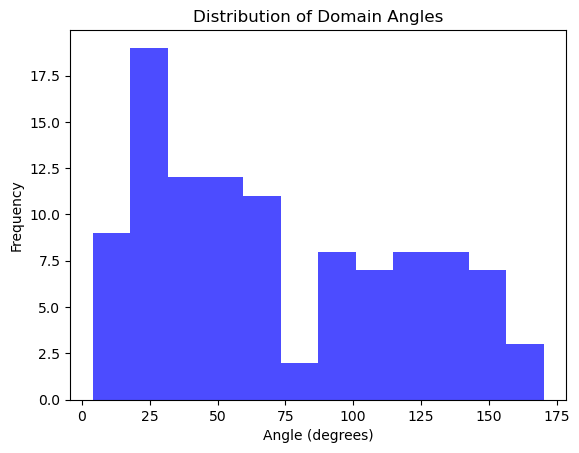

In [199]:
plt.hist(angles, bins=12, color='blue', alpha=0.7)
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.title("Distribution of Domain Angles")
plt.show()

In [200]:
from sklearn.cluster import KMeans

# Convert angles to a numpy array
angles2 = np.array(angles).reshape(-1, 1)

# Perform K-Means clustering
n = 3  # Adjust based on your data~
kmeans = KMeans(n_clusters=n, random_state=42)
labels = kmeans.fit_predict(angles2)

# Print cluster assignments
for i, label in enumerate(labels):
    filename = f'fold_{i+1}.pdb'
    print(f"PDB File {[i+1]}: Cluster {label}")

PDB File [1]: Cluster 1
PDB File [2]: Cluster 0
PDB File [3]: Cluster 0
PDB File [4]: Cluster 0
PDB File [5]: Cluster 2
PDB File [6]: Cluster 0
PDB File [7]: Cluster 1
PDB File [8]: Cluster 1
PDB File [9]: Cluster 2
PDB File [10]: Cluster 0
PDB File [11]: Cluster 0
PDB File [12]: Cluster 2
PDB File [13]: Cluster 0
PDB File [14]: Cluster 2
PDB File [15]: Cluster 2
PDB File [16]: Cluster 1
PDB File [17]: Cluster 1
PDB File [18]: Cluster 0
PDB File [19]: Cluster 1
PDB File [20]: Cluster 0
PDB File [21]: Cluster 1
PDB File [22]: Cluster 0
PDB File [23]: Cluster 2
PDB File [24]: Cluster 1
PDB File [25]: Cluster 1
PDB File [26]: Cluster 2
PDB File [27]: Cluster 2
PDB File [28]: Cluster 0
PDB File [29]: Cluster 1
PDB File [30]: Cluster 0
PDB File [31]: Cluster 0
PDB File [32]: Cluster 1
PDB File [33]: Cluster 1
PDB File [34]: Cluster 0
PDB File [35]: Cluster 2
PDB File [36]: Cluster 2
PDB File [37]: Cluster 2
PDB File [38]: Cluster 1
PDB File [39]: Cluster 2
PDB File [40]: Cluster 0
PDB File 

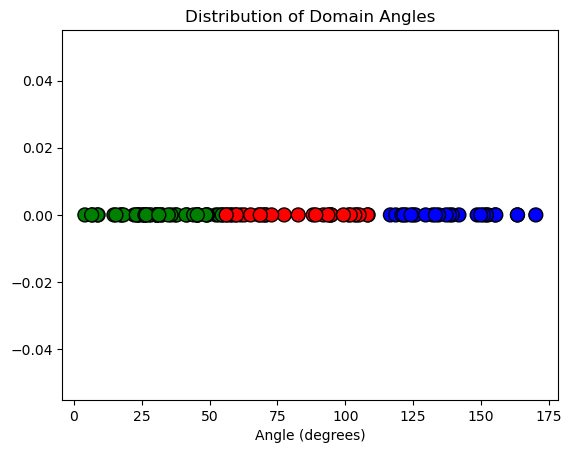

In [201]:
ones = np.ones(40)
colours = ['red', 'green', 'blue', 'yellow']

plt.scatter(angles, [0] * len(angles), c=[colours[label] for label in labels], s=100, edgecolors='k')
plt.xlabel("Angle (degrees)")
plt.title("Distribution of Domain Angles")
plt.show()

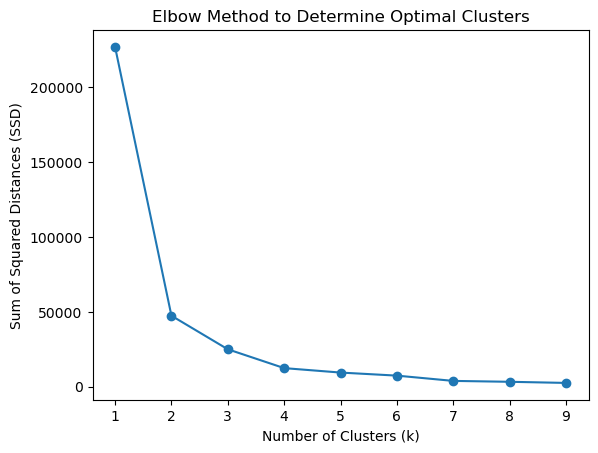

In [202]:
ssd = []
k_values = range(1, 10)  # Try 1 to 9 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(angles2)
    ssd.append(kmeans.inertia_)  # Inertia is the SSD

# Step 2: Plot SSD vs. k
plt.plot(k_values, ssd, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.show()

In [203]:
anglesMean = np.mean(angles)
anglesStd = np.std(angles)
print(anglesMean)
print(anglesStd)

72.66465431339894
46.267456489270835


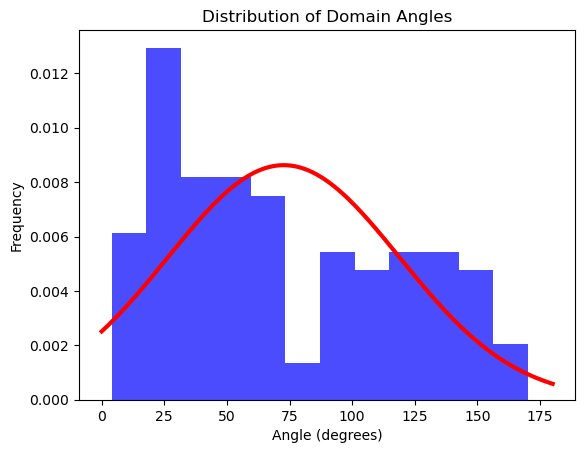

In [204]:
from scipy.stats import norm

plt.hist(angles, bins=12, color='blue', alpha=0.7, density=True)

x = np.linspace(0, 180,1000)
y = norm.pdf(x, anglesMean, anglesStd)
plt.plot(x, y, color='red', linewidth=3)

plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.title("Distribution of Domain Angles")
plt.show()


In [205]:
target = [
    anglesMean,
    anglesMean - anglesStd,
    anglesMean + anglesStd,
    min(angles),
    max(angles)
]

indices = [np.argmin(np.abs(angles - tar))+1 for tar in target]
samples = [angles[idx] for idx in indices]

print(indices)

[69, 71, 39, 29, 98]


## Comparaison between ARC and ARC + TAU  Structures (Gag and Viral domain angles)

In [51]:
#Folds Marco

n_terminal = range(17,155)
capsid = range(205,365)
angles_M = [] #Angles Marco

for i in np.arange(140)+1:
    parser = PDBParser(QUIET=True)
    filename=f"Folds_Marco/fold_{i}.pdb"
    structure = parser.get_structure("protein", filename)
    
    # Extract coordinates for the two domains
    n_coords = coordinates(structure, n_terminal)
    c_coords = coordinates(structure, capsid)

     # Compute principal axes
    n_axis = principal_axis(n_coords)
    c_axis = principal_axis(c_coords)

    # Compute angle between the axes
    angle = domain_angle(n_axis, c_axis)
  #B = 180 - A
  #angle = min(A, B)
    angles_M.append(angle)

In [207]:
print(angles_M)

[110.43625995168496, 82.76717615009235, 75.26723070326985, 68.74326042208446, 60.09783124414749, 93.78115255226236, 49.4955589517165, 72.45938047606481, 72.45938047606481, 68.47657757357925, 66.6699834268043, 83.7531905509858, 69.22509974424098, 116.10141285772491, 83.35197832933027, 102.43724836953784, 97.25962785318283, 107.26637833351951, 85.13862362112467, 78.19576779152037, 84.31049307837174, 72.70925679674805, 82.58839016336434, 74.0126204872152, 75.15896566080349, 103.56423931187271, 51.97872460733269, 112.47512644306958, 87.90919737680616, 86.0344263653824, 74.82748830587282, 100.69903064199886, 62.13195871443253, 69.93553785003785, 96.76196099220643, 84.12438080153852, 109.57294077480913, 81.93627306003205, 93.15006720771123, 72.50283295115241, 78.57084024668207, 97.89893001683572, 101.27959513934226, 109.177943235326, 90.65291874411919, 45.11509248404032, 85.04986930128051, 81.85394523077841, 87.17460597591351, 81.62704052263436, 69.24817864224907, 135.39003131138742, 67.6741

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm

def analyze_domain_angles(angles, n_clusters=3, k_max=9):
    """
    Analyze and visualize domain angles distribution and clustering.

    Parameters:
        angles (list or numpy array): List of angles in degrees.
        n_clusters (int): Number of clusters for K-Means clustering.
        k_max (int): Maximum number of clusters to consider for the Elbow method.
    """
    angles = np.array(angles)

    # Plot histogram of angles
    plt.hist(angles, bins=12, color='blue', alpha=0.7)
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Domain Angles")
    plt.show()

    # K-Means clustering
    angles_reshaped = angles.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(angles_reshaped)

    # Scatter plot of angles with cluster labels
    colours = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
    plt.scatter(angles, [0] * len(angles), c=[colours[label] for label in labels], s=100, edgecolors='k')
    plt.xlabel("Angle (degrees)")
    plt.title("Clustered Domain Angles")
    plt.show()

    # Elbow method to determine optimal clusters
    ssd = []
    k_values = range(1, k_max + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(angles_reshaped)
        ssd.append(kmeans.inertia_)

    plt.plot(k_values, ssd, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squared Distances (SSD)")
    plt.title("Elbow Method to Determine Optimal Clusters")
    plt.show()

    # Fit a normal distribution to the angles
    angles_mean = np.mean(angles)
    angles_std = np.std(angles)

    plt.hist(angles, bins=12, color='blue', alpha=0.7, density=True)
    x = np.linspace(0, 180, 1000)
    y = norm.pdf(x, angles_mean, angles_std)
    plt.plot(x, y, color='red', linewidth=3)
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Domain Angles with Normal Fit")
    plt.show()

    return {
        "mean": angles_mean,
        "std": angles_std,
        "labels": labels,
        "ssd": ssd
    }

In [209]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def analyze_domain_angles(angles, n_clusters=3, k_max=9):
    """
    Analyze and visualize domain angles distribution and clustering.

    Parameters:
        angles (list or numpy array): List of angles in degrees.
        n_clusters (int): Number of clusters for K-Means clustering.
        k_max (int): Maximum number of clusters to consider for the Elbow method.
    """
    angles = np.array(angles)

    # Plot histogram of angles
    plt.hist(angles, bins=12, color='blue', alpha=0.7, density=True)
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Density")
    plt.title("Distribution of Domain Angles")
    plt.show()

    # K-Means clustering
    angles_reshaped = angles.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(angles_reshaped)

    # Scatter plot of angles with cluster labels
    colours = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
    plt.scatter(angles, [0] * len(angles), c=[colours[label] for label in labels], s=100, edgecolors='k')
    plt.xlabel("Angle (degrees)")
    plt.title("Clustered Domain Angles")
    plt.show()

    # Elbow method to determine optimal clusters
    ssd = []
    k_values = range(1, k_max + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(angles_reshaped)
        ssd.append(kmeans.inertia_)

    plt.plot(k_values, ssd, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squared Distances (SSD)")
    plt.title("Elbow Method to Determine Optimal Clusters")
    plt.show()

    # Overlay Gaussians for each cluster with proper normalization
    plt.hist(angles, bins=12, color='blue', alpha=0.7, density=True)
    x = np.linspace(0, 180, 1000)

    cluster_means = []
    cluster_stds = []
    cluster_sizes = []

    for i in range(n_clusters):
        cluster_angles = angles[labels == i]
        cluster_mean = np.mean(cluster_angles)
        cluster_std = np.std(cluster_angles)
        cluster_size = len(cluster_angles)

        cluster_means.append(cluster_mean)
        cluster_stds.append(cluster_std)
        cluster_sizes.append(cluster_size)

        # Normalized Gaussian curve for this cluster
        weight = cluster_size / len(angles)
        y = weight * norm.pdf(x, cluster_mean, cluster_std)
        plt.plot(x, y, label=f"Cluster {i + 1}: μ={cluster_mean:.2f}, σ={cluster_std:.2f}, weight={weight:.2f}")

    # Total Gaussian based on overall mean and standard deviation
    total_mean = np.mean(angles)
    total_std = np.std(angles)
    total_y = norm.pdf(x, total_mean, total_std)
    plt.plot(x, total_y, color='black', linewidth=2, label=f"Total: μ={total_mean:.2f}, σ={total_std:.2f}")

    plt.xlabel("Angle (degrees)")
    plt.ylabel("Density")
    plt.title("Domain Angles with Normalized Gaussian Curves (Clusters + Total)") #Domain Angles with Normalized Gaussian Curves (Clusters + Total)
    plt.legend()
    plt.show()

    return {
        "total_mean": total_mean,
        "total_std": total_std,
        "cluster_means": cluster_means,
        "cluster_stds": cluster_stds,
        "cluster_sizes": cluster_sizes,
        "labels": labels,
        "ssd": ssd
    }

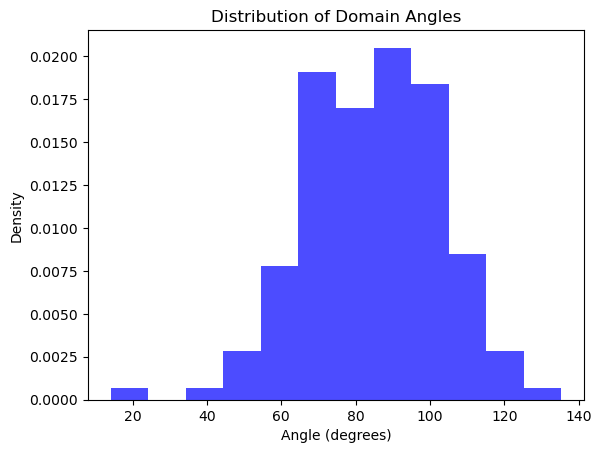

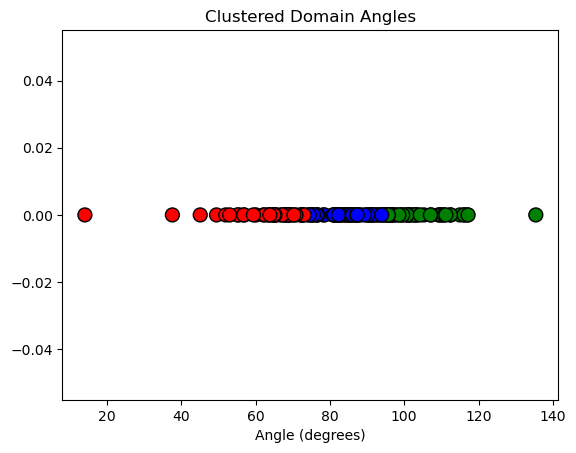

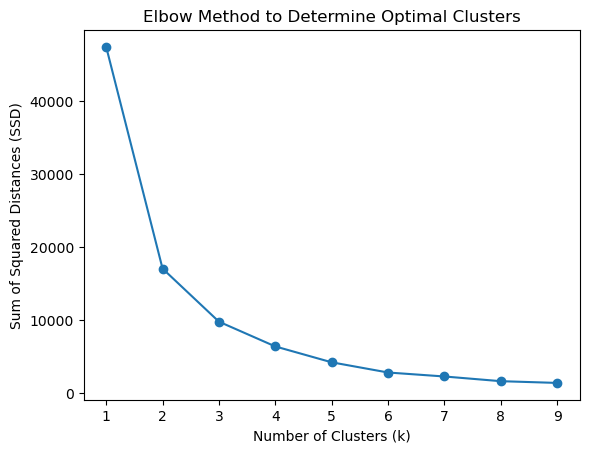

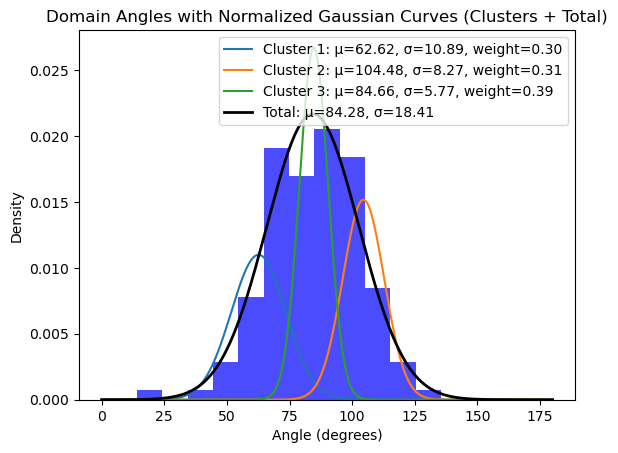

{'total_mean': 84.27576341817984,
 'total_std': 18.41060980292316,
 'cluster_means': [62.61747401290762, 104.47646581642016, 84.66126803852903],
 'cluster_stds': [10.892304667478472, 8.270702602151749, 5.766835461386303],
 'cluster_sizes': [42, 44, 54],
 'labels': array([1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0,
        2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1,
        2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0,
        2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2,
        2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1,
        2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0,
        2, 2, 2, 1, 2, 2, 1, 0], dtype=int32),
 'ssd': [47453.077464168644,
  17062.908283630593,
  9788.620715057765,
  6393.918528003525,
  4219.0381853267,
  2820.2294814922343,
  2274.781361949441,
  1631.1011269468195,
  1392.050841353107]}

In [210]:
analyze_domain_angles(angles_M)

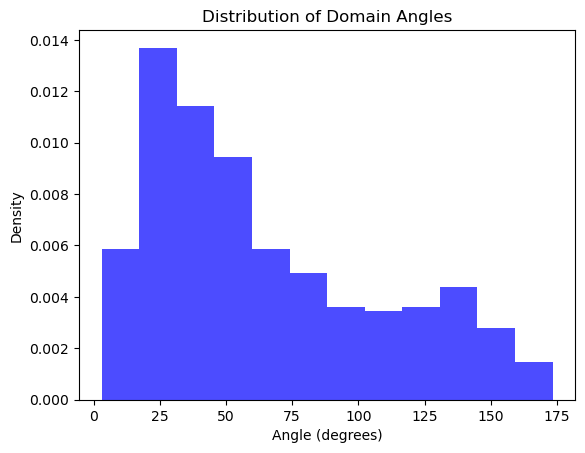

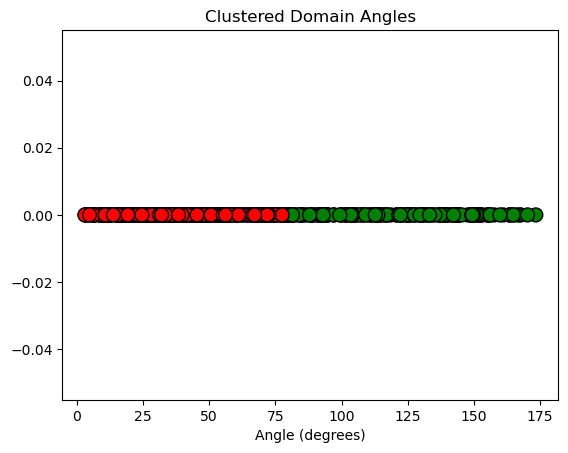

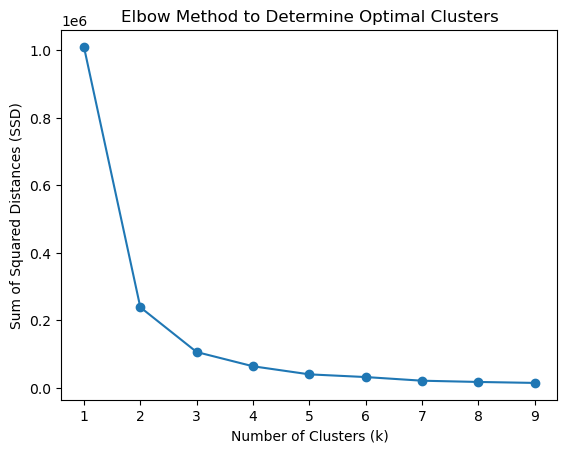

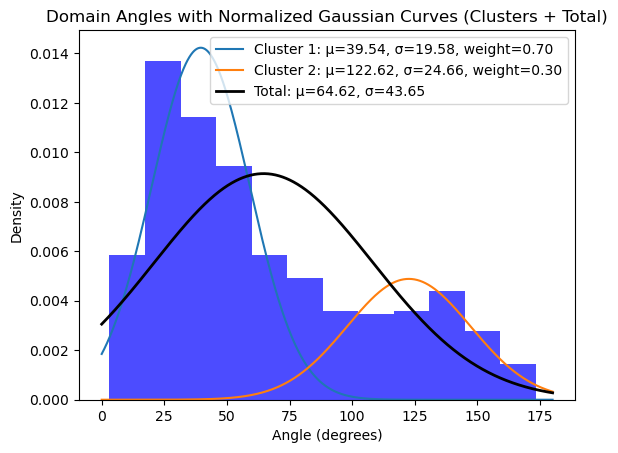

In [211]:
res=analyze_domain_angles(total_angles,n_clusters=2) #angles_model["model_3"]

It seems that there a 2 major clusters. We now analyse how they differ

We create one array for each cluster

In [212]:
#total_angles
data1=total_angles[np.where(res["labels"]==1)]
data2=total_angles[np.where(res["labels"]==0)]

In [213]:
import numpy as np
from scipy import stats

clustering_results=res

# Input delta degrees
delta_degrees = 83  # Example value, adjust as needed

# Extract means, standard deviations, and sizes
mean1 = clustering_results['cluster_means'][0]
mean2 = clustering_results['cluster_means'][1]
std1 = clustering_results['cluster_stds'][0]
std2 = clustering_results['cluster_stds'][1]
n1 = clustering_results['cluster_sizes'][0]
n2 = clustering_results['cluster_sizes'][1]

# Calculate the difference in means
mean_diff = np.abs(mean2 - mean1)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((std1**2) / n1) + ((std2**2) / n2))

# Calculate t-statistic
t_statistic = mean_diff / pooled_std

# Calculate degrees of freedom
df = n1 + n2 - 2

# Calculate the p-value (two-tailed)
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Determine if the difference is compatible with delta degrees
critical_value = stats.t.ppf(1 - 0.05/2, df)  # Two-tailed test at alpha=0.05
confidence_interval = critical_value * pooled_std

lower_bound = mean_diff - confidence_interval
upper_bound = mean_diff + confidence_interval

print(f"Mean Difference: {mean_diff:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")

if lower_bound <= delta_degrees <= upper_bound:
    print(f"The difference is compatible with an input delta of {delta_degrees} degrees.")
else:
    print(f"The difference is NOT compatible with an input delta of {delta_degrees} degrees.")


Mean Difference: 83.0763
T-statistic: 37.7743
Degrees of Freedom: 528
P-value: 0.0000
The difference is compatible with an input delta of 83 degrees.


### We now perform a test of (non-)equivalence for two independent samples

null hypothesis:  m1 - m2 < low or m1 - m2 > upp

 alternative hypothesis:  low < m1 - m2 < upp

 In our case we consider low=upp=5 deg

In [214]:
import numpy as np
from statsmodels.stats.weightstats import ttost_ind

clustering_results = res

# Input delta degrees
delta_degrees = 83  # Target difference
equivalence_margin = 4  # Define your equivalence margin (e.g., ±5 degrees)

# Extract means and sizes
mean1 = clustering_results['cluster_means'][0]
mean2 = clustering_results['cluster_means'][1]
n1 = clustering_results['cluster_sizes'][0]
n2 = clustering_results['cluster_sizes'][1]

# Assuming you have access to the original data points


# Perform the Two One-Sided Tests (TOST)
low_equiv_bound = delta_degrees - equivalence_margin
upp_equiv_bound = delta_degrees + equivalence_margin

p1 = ttost_ind(data1, data2, low_equiv_bound, upp_equiv_bound, usevar='pooled')

p0=p1[0]
p2=p1[1]
p3=p1[2]

print(f"TOST Lower Bound Test Statistic: p-value: {p1[1][1]:.4f}")
print(f"TOST Upper Bound Test Statistic: p-value: {p1[2][1]:.4f}")
print(f"TOST overall Test Statistic: p-value: {p1[0]:.4f}")


if p0 < 0.05:
    print(f"The difference between the two means is equivalent to {delta_degrees} degrees within the ±{equivalence_margin} degrees margin.")
else:
    print(f"The difference between the two means is NOT equivalent to {delta_degrees} degrees within the ±{equivalence_margin} degrees margin.")


TOST Lower Bound Test Statistic: p-value: 0.0217
TOST Upper Bound Test Statistic: p-value: 0.0259
TOST overall Test Statistic: p-value: 0.0259
The difference between the two means is equivalent to 83 degrees within the ±4 degrees margin.


## We choose 2 target values (one for each cluster) for the simulations

In [215]:
# Target value
targets = res["cluster_means"]

# Find the index of the closest value
closest_index = np.argmin(np.abs(total_angles - (targets[1]+targets[0])/2-11))

# Get the closest value
closest_value = total_angles[closest_index]

print(f"Closest value (second peak): {closest_value} at index {closest_index}")
print(f"Corresponding pdb: ",total_pdb_file[closest_index])

# Find the index of the closest value
closest_index = np.argmin(np.abs(total_angles - targets[1]))

# Get the closest value
closest_value = total_angles[closest_index]

print(f"Closest value (first peak): {closest_value} at index {closest_index}")
print(f"Corresponding pdb: ",total_pdb_file[closest_index])

Closest value (second peak): 91.94314614452554 at index 95
Corresponding pdb:  Folds/arc_tau_seed316612/fold_arc_tau_seed316612_model_0.pdb
Closest value (first peak): 122.46527804347403 at index 130
Corresponding pdb:  Folds/arc_tau_seed657436/fold_arc_tau_seed657436_model_1.pdb


# Analyze contact patterns between ARC and TAU

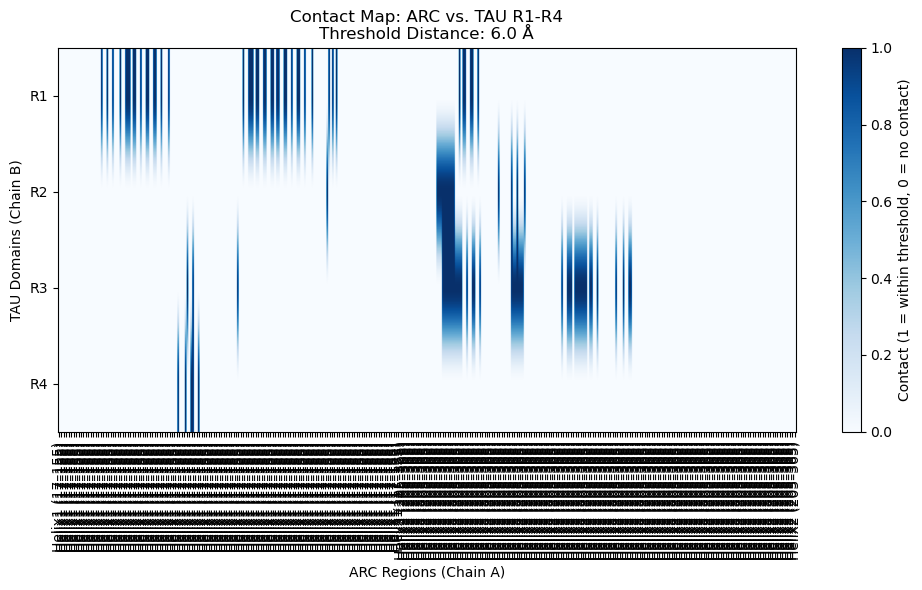

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def generate_contact_map(pdb_file, threshold_distance):
    """
    Generate a contact map to show interactions between ARC (Chain A) and 
    TAU (Chain B), specifically the R1-R4 regions of TAU.

    Args:
        pdb_file (str): Path to the PDB file containing ARC and TAU structures.
        threshold_distance (float): Threshold distance in Å to define contacts.

    Returns:
        None: Displays a contact map.
    """
    # Load the PDB file
    u = mda.Universe(pdb_file)

    # Select ARC and TAU based on chain identifiers
    arc = u.select_atoms("byres (protein and segid A)")  # Chain A
    tau = u.select_atoms("byres (protein and segid B)")  # Chain B

    # Define TAU's R1-R4 domains
    r1 = tau.select_atoms("resid 1:30")  #Reference [https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2021.702788/full]
    r2 = tau.select_atoms("resid 31:61")
    r3 = tau.select_atoms("resid 62:92")
    r4 = tau.select_atoms("resid 93:126")

    tau_domains = [r1, r2, r3, r4]
    domain_names = ["R1", "R2", "R3", "R4"]

    # Define ARC's functional domains
    arc_helix1 = arc.select_atoms("resid 17:155")
    arc_helix2 = arc.select_atoms("resid 205:365")

    arc_domains = [arc_helix1, arc_helix2]
    arc_domain_names = ["Helix1 (17–155)", "Helix2 (205–365)"]

    # Initialize the contact map matrix
    contact_map = np.zeros((len(tau_domains), len(arc.residues)))

    # Check distances between ARC residues and TAU domains
    for i, domain in enumerate(tau_domains):
        for j, arc_res in enumerate(arc.residues):
            # Compute the minimum distance between residues
            distances = np.linalg.norm(domain.positions[:, np.newaxis] - arc_res.atoms.positions, axis=-1)
            if np.min(distances) < threshold_distance:
                contact_map[i, j] = 1

    # Generate x-axis domain labels
    xticks = []
    xticklabels = []
    for k, arc_domain in enumerate(arc_domains):
        xticks.extend(range(len(arc_domain.residues)))
        xticklabels.extend([arc_domain_names[k]] * len(arc_domain.residues))

    # Plot the contact map
    plt.figure(figsize=(10, 6))
    plt.imshow(contact_map, aspect='auto', cmap="Blues", origin='upper')
    plt.colorbar(label="Contact (1 = within threshold, 0 = no contact)")
    plt.xticks(
        ticks=np.linspace(0, len(arc.residues) - 1, len(xticklabels)),
        labels=xticklabels,
        rotation=90,
    )
    plt.yticks(ticks=np.arange(len(tau_domains)), labels=domain_names)
    plt.xlabel("ARC Regions (Chain A)")
    plt.ylabel("TAU Domains (Chain B)")
    plt.title(f"Contact Map: ARC vs. TAU R1-R4\nThreshold Distance: {threshold_distance} Å")
    plt.tight_layout()
    plt.show()

# Example Usage
file = "Folds/arc_tau_seed2/fold_arc_tau_seed2_model_0.pdb"
threshold_distance = 6.0

generate_contact_map(file, threshold_distance)

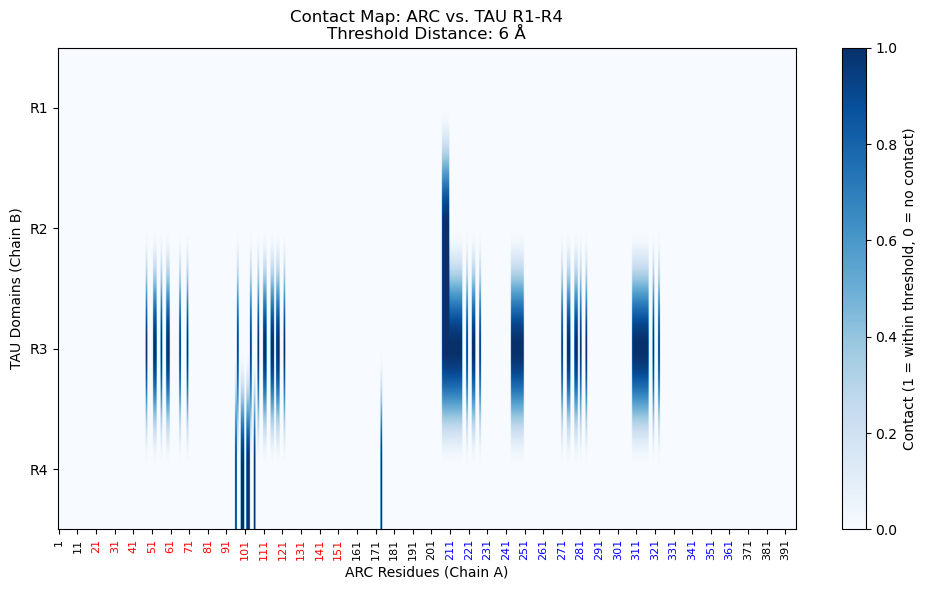

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def generate_contact_map(pdb_file, threshold_distance):
    """
    Generate a contact map to show interactions between ARC (Chain A) and 
    TAU (Chain B), specifically the R1-R4 regions of TAU.

    Args:
        pdb_file (str): Path to the PDB file containing ARC and TAU structures.
        threshold_distance (float): Threshold distance in Å to define contacts.

    Returns:
        None: Displays a contact map.
    """
    # Load the PDB file
    u = mda.Universe(pdb_file)

    # Select ARC and TAU based on chain identifiers
    arc = u.select_atoms("byres (protein and segid A)")  # Chain A
    tau = u.select_atoms("byres (protein and segid B)")  # Chain B

    # Define TAU's R1-R4 domains
    r1 = tau.select_atoms("resid 1:30")
    r2 = tau.select_atoms("resid 31:61")
    r3 = tau.select_atoms("resid 62:92")
    r4 = tau.select_atoms("resid 93:126")

    tau_domains = [r1, r2, r3, r4]
    domain_names = ["R1", "R2", "R3", "R4"]

    # Define ARC's functional domains
    n_terminal = range(17, 155)
    capsid = range(205, 365)

    # Initialize the contact map matrix
    contact_map = np.zeros((len(tau_domains), len(arc.residues)))

    # Check distances between ARC residues and TAU domains
    for i, domain in enumerate(tau_domains):
        for j, arc_res in enumerate(arc.residues):
            # Compute the minimum distance between residues
            distances = np.linalg.norm(domain.positions[:, np.newaxis] - arc_res.atoms.positions, axis=-1)
            if np.min(distances) < threshold_distance:
                contact_map[i, j] = 1

    # Generate x-axis tick positions and colored labels
    xticks = []
    xticklabels = []
    for i, arc_res in enumerate(arc.residues):
        if i % 10 == 0:  # Add every 10th residue
            xticks.append(i)
            if arc_res.resid in n_terminal:
                xticklabels.append((arc_res.resid, "red"))  # Highlight n_terminal in red
            elif arc_res.resid in capsid:
                xticklabels.append((arc_res.resid, "blue"))  # Highlight capsid in blue
            else:
                xticklabels.append((arc_res.resid, "black"))  # Default black for others

    # Plot the contact map
    plt.figure(figsize=(10, 6))
    plt.imshow(contact_map, aspect='auto', cmap="Blues", origin='upper')
    plt.colorbar(label="Contact (1 = within threshold, 0 = no contact)")

    # Customize x-axis labels with colors
    ax = plt.gca()
    ax.set_xticks(xticks)
    ax.set_xticklabels(
        [str(res[0]) for res in xticklabels],  # Residue numbers
        rotation=90,
        fontsize=8,
    )
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        label.set_color([res[1] for res in xticklabels][tick // 10])

    plt.yticks(ticks=np.arange(len(tau_domains)), labels=domain_names)
    plt.xlabel("ARC Residues (Chain A)")
    plt.ylabel("TAU Domains (Chain B)")
    plt.title(f"Contact Map: ARC vs. TAU R1-R4\nThreshold Distance: {threshold_distance} Å")
    plt.tight_layout()
    plt.show()

# Example Usage
n=8
i=4
file = f"Folds/arc_tau_seed{n}/fold_arc_tau_seed{n}_model_{i}.pdb"
threshold_distance = 6

generate_contact_map(file, threshold_distance)

Contacts between the repeated domains and matrix/ N terminal seem to vary wildly with different seeds (and model within the seed)

However we can see if there is there are some preferred patterns of interactions in the initial configurations

In [42]:
import numpy as np
import MDAnalysis as mda

def compute_interaction_fractions(pdb_file, threshold_distance):
    """
    Compute the fraction of interactions for each TAU domain (R1-R4) 
    with the N-terminal and capsid domains of ARC.

    Args:
        pdb_file (str): Path to the PDB file containing ARC and TAU structures.
        threshold_distance (float): Threshold distance in Å to define contacts.

    Returns:
        dict: Fractions of interactions for each TAU domain with the N-terminal 
              and capsid domains of ARC.
    """
    # Load the PDB file
    u = mda.Universe(pdb_file)

    # Select ARC and TAU based on chain identifiers
    arc = u.select_atoms("byres (protein and segid A)")  # Chain A
    tau = u.select_atoms("byres (protein and segid B)")  # Chain B

    # Define TAU's R1-R4 domains
    r1 = tau.select_atoms("resid 1:30")
    r2 = tau.select_atoms("resid 31:61")
    r3 = tau.select_atoms("resid 62:92")
    r4 = tau.select_atoms("resid 93:126")
    tau_domains = [r1, r2, r3, r4]
    domain_names = ["R1", "R2", "R3", "R4"]

    # Define ARC's N-terminal and capsid domains
    n_terminal = arc.select_atoms("resid 17:155")
    capsid = arc.select_atoms("resid 205:365")

    # Initialize a dictionary to store results
    interaction_fractions = {}

    # Compute interactions for each TAU domain
    for domain, name in zip(tau_domains, domain_names):
        # Interactions with N-terminal
        n_contacts = sum(
            np.min(np.linalg.norm(domain.positions[:, np.newaxis] - n_terminal.positions, axis=-1), axis=-1)
            < threshold_distance
        )

        # Interactions with capsid
        capsid_contacts = sum(
            np.min(np.linalg.norm(domain.positions[:, np.newaxis] - capsid.positions, axis=-1), axis=-1)
            < threshold_distance
        )

        # Total contacts
        total_contacts = n_contacts + capsid_contacts

        # Calculate fractions
        n_fraction = n_contacts / total_contacts if total_contacts > 0 else 0
        capsid_fraction = capsid_contacts / total_contacts if total_contacts > 0 else 0

        # Store results
        interaction_fractions[name] = {
            "N-terminal_fraction": n_fraction,
            "Capsid_fraction": capsid_fraction,
        }

    return interaction_fractions


# Example Usage

n = 2
i = 1
file = f"Folds/arc_tau_seed{n}/fold_arc_tau_seed{n}_model_{i}.pdb"

fractions = compute_interaction_fractions(file, threshold_distance)
print(fractions)

{'R1': {'N-terminal_fraction': 1.0, 'Capsid_fraction': 0.0}, 'R2': {'N-terminal_fraction': 0.9111111111111111, 'Capsid_fraction': 0.08888888888888889}, 'R3': {'N-terminal_fraction': 0.05785123966942149, 'Capsid_fraction': 0.9421487603305785}, 'R4': {'N-terminal_fraction': 1.0, 'Capsid_fraction': 0.0}}


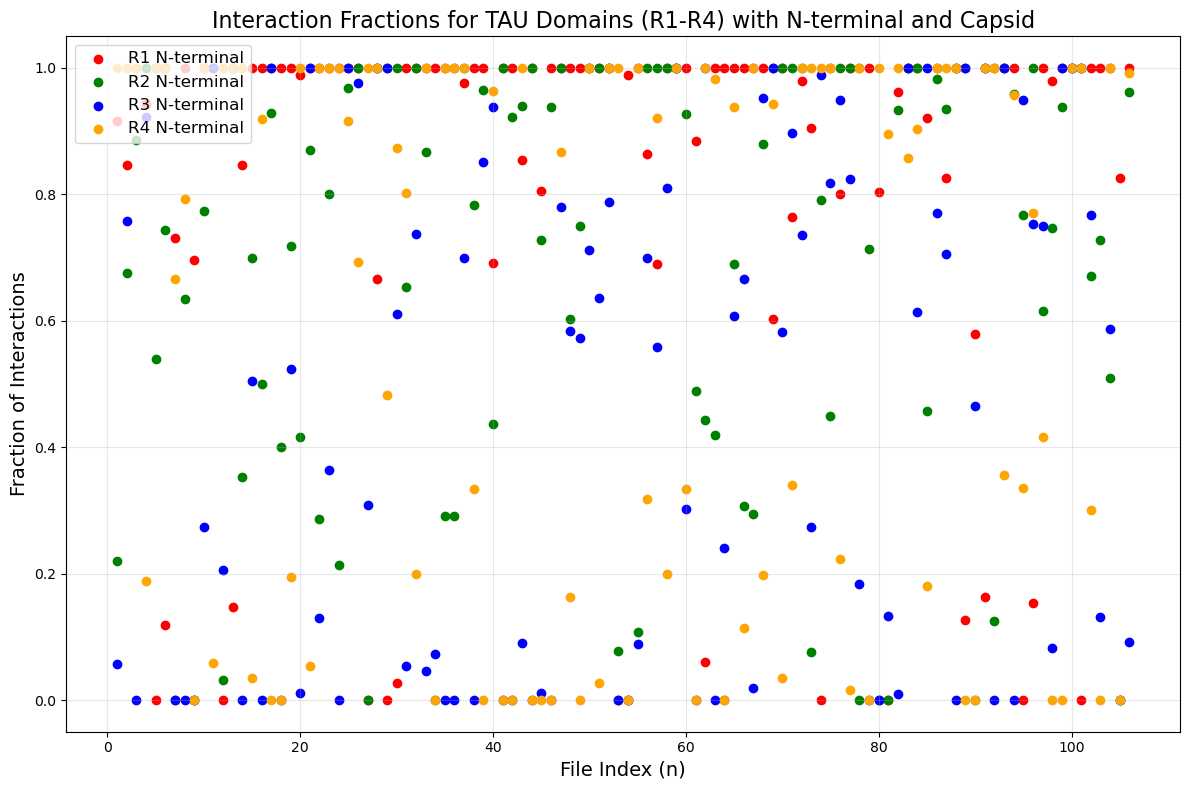

In [43]:
"""
Plotting
"""
fractions_v=[]
for file in pdb_file:
    fractions = compute_interaction_fractions(file, threshold_distance)
    fractions_v.append(fractions)

# Prepare data for plotting
n_values = range(1, len(pdb_file) + 1)  # File indices
fractions_r1_nt = [f["R1"]["N-terminal_fraction"] for f in fractions_v]
fractions_r2_nt = [f["R2"]["N-terminal_fraction"] for f in fractions_v]
fractions_r3_nt = [f["R3"]["N-terminal_fraction"] for f in fractions_v]
fractions_r4_nt = [f["R4"]["N-terminal_fraction"] for f in fractions_v]

fractions_r1_capsid = [f["R1"]["Capsid_fraction"] for f in fractions_v]
fractions_r2_capsid = [f["R2"]["Capsid_fraction"] for f in fractions_v]
fractions_r3_capsid = [f["R3"]["Capsid_fraction"] for f in fractions_v]
fractions_r4_capsid = [f["R4"]["Capsid_fraction"] for f in fractions_v]

# Plotting
plt.figure(figsize=(12, 8))

# Plot N-terminal fractions
plt.scatter(n_values, fractions_r1_nt, label="R1 N-terminal", marker='o', linestyle='-', color='red')
plt.scatter(n_values, fractions_r2_nt, label="R2 N-terminal", marker='o', linestyle='-', color='green')
plt.scatter(n_values, fractions_r3_nt, label="R3 N-terminal", marker='o', linestyle='-', color='blue')
plt.scatter(n_values, fractions_r4_nt, label="R4 N-terminal", marker='o', linestyle='-', color='orange')

# Plot Capsid fractions
#plt.plot(n_values, fractions_r1_capsid, label="R1 Capsid", marker='s', linestyle='--', color='red', alpha=0.7)
#plt.plot(n_values, fractions_r2_capsid, label="R2 Capsid", marker='s', linestyle='--', color='green', alpha=0.7)
#plt.plot(n_values, fractions_r3_capsid, label="R3 Capsid", marker='s', linestyle='--', color='blue', alpha=0.7)
#plt.plot(n_values, fractions_r4_capsid, label="R4 Capsid", marker='s', linestyle='--', color='orange', alpha=0.7)

# Add labels, legend, and grid
plt.xlabel("File Index (n)", fontsize=14)
plt.ylabel("Fraction of Interactions", fontsize=14)
plt.title("Interaction Fractions for TAU Domains (R1-R4) with N-terminal and Capsid", fontsize=16)
plt.legend(fontsize=12, loc="upper left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Perform Statistical Test

## Hypotheses

### Null Hypothesis (H₀)  
The fraction of interactions with the N-terminal (\(N_{\text{terminal\_fraction}}\)) does not vary significantly across the TAU domains \(R1\), \(R2\), \(R3\), and \(R4\).  

**Mathematically:**  
$$
H₀: \mu_{R1} = \mu_{R2} = \mu_{R3} = \mu_{R4}
$$

### Alternative Hypothesis (H₁)  
The fraction of interactions with the N-terminal $(N_{\text{terminal\_fraction}})$ varies significantly across the TAU domains \(R1\), \(R2\), \(R3\), and \(R4\).  

**Mathematically:**  
$$
H₁: \text{At least one } \mu_{Ri} \neq \mu_{Rj} \text{ for } i \neq j
$$



Generate a dataset with all the contacts patterns for each seed / model

In [44]:
#Statistical tests
import pandas as pd

def generate_interaction_dataset(random_seeds, models, threshold_distance):
    """
    Generate a dataset of interaction fractions for R1-R4 with N-terminal and Capsid
    for each seed and model.

    Args:
        random_seeds (list): List of random seeds.
        models (list): List of model names (e.g., ["model_0", "model_1", ...]).
        threshold_distance (float): Threshold distance to compute interactions.

    Returns:
        pd.DataFrame: DataFrame containing interaction fractions.
    """
    # Placeholder for results
    results = []

    # Loop through each seed and model
    for seed in random_seeds:
        for model in models:
            # Construct the file path
            pdb_file = f'Folds/arc_tau_seed{seed}/fold_arc_tau_seed{seed}_{model}.pdb'

            # Compute interaction fractions
            fractions = compute_interaction_fractions(pdb_file, threshold_distance)

            # Append results for each domain
            for domain, fractions_dict in fractions.items():
                results.append({
                    "Seed": seed,
                    "Model": model,
                    "Domain": domain,
                    "N_terminal_fraction": fractions_dict["N-terminal_fraction"],
                    "Capsid_fraction": fractions_dict["Capsid_fraction"]
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(results)
    return df

# Example usage
#random seeds defined before
models = [f"model_{i}" for i in np.arange(5)]  # model_0 to model_4
threshold_distance = 3  # Example threshold distance

# Generate dataset
interaction_df = generate_interaction_dataset(random_seeds, models, threshold_distance)

# Save to CSV for later use
interaction_df.to_csv("interaction_fractions.csv", index=False)


# Preview the dataset
print(interaction_df.head())

   Seed    Model Domain  N_terminal_fraction  Capsid_fraction
0     2  model_0     R1             0.888889         0.111111
1     2  model_0     R2             0.000000         0.000000
2     2  model_0     R3             0.000000         1.000000
3     2  model_0     R4             0.000000         0.000000
4     2  model_1     R1             1.000000         0.000000


# ANOVA 2 factors statistical test

In [45]:
from scipy.stats import f_oneway
import pandas as pd

# Load the dataset (if not already loaded)
df=interaction_df

# Group N_terminal_fraction by Domain
r1_fractions = df[df["Domain"] == "R1"]["N_terminal_fraction"]
r2_fractions = df[df["Domain"] == "R2"]["N_terminal_fraction"]
r3_fractions = df[df["Domain"] == "R3"]["N_terminal_fraction"]
r4_fractions = df[df["Domain"] == "R4"]["N_terminal_fraction"]

# Perform one-way ANOVA
stat, p_value = f_oneway(r1_fractions, r2_fractions, r3_fractions, r4_fractions)

# Output results
print(f"ANOVA F-statistic: {stat:.3f}")
print(f"ANOVA p-value: {p_value:.3e}")

# Interpret results
if p_value < 0.05:
    print("Reject H0: The N-terminal fractions vary significantly with the domain (p < 0.05).")
else:
    print("Fail to reject H0: No significant variation in N-terminal fractions across domains.")

ANOVA F-statistic: 14.746
ANOVA p-value: 1.670e-09
Reject H0: The N-terminal fractions vary significantly with the domain (p < 0.05).


## If H0 is rejected, which are the most relevant domains ?

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    R1     R2  -0.1321    0.0 -0.2042 -0.0601   True
    R1     R3  -0.1757    0.0 -0.2478 -0.1036   True
    R1     R4  -0.0733 0.0447 -0.1454 -0.0012   True
    R2     R3  -0.0436 0.4059 -0.1156  0.0285  False
    R2     R4   0.0589 0.1533 -0.0132   0.131  False
    R3     R4   0.1024 0.0015  0.0303  0.1745   True
----------------------------------------------------


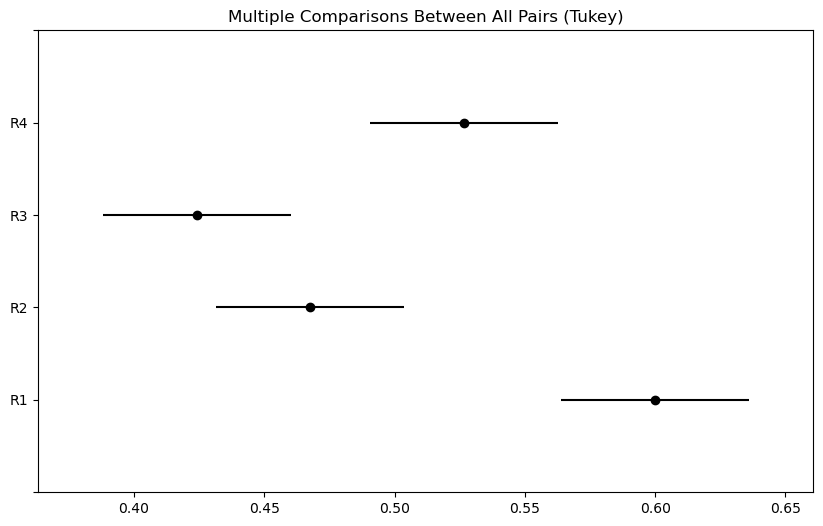

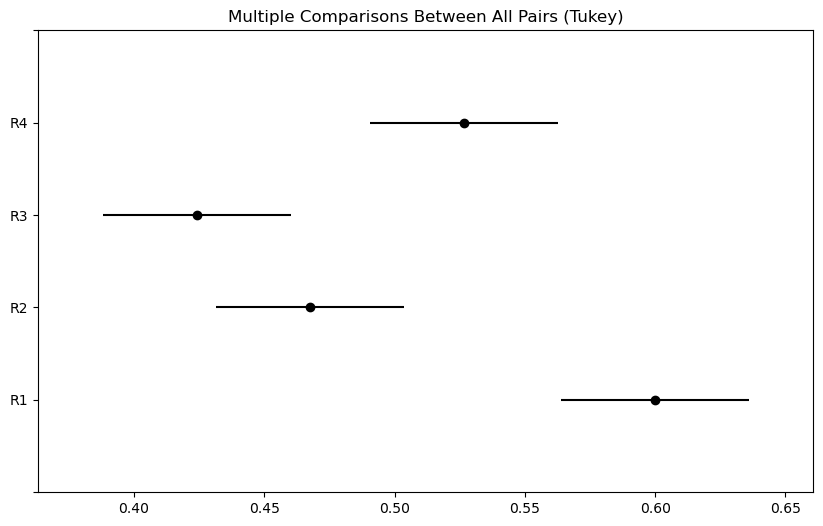

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    df["N_terminal_fraction"], df["Domain"], alpha=0.05
)
print(tukey)
tukey.plot_simultaneous()  # Visualize results

#print("Capsid_fraction\n")
# Perform Tukey's HSD test
#tukey = pairwise_tukeyhsd(
#    df["Capsid_fraction"], df["Domain"], alpha=0.05
#)
#print(tukey)
#tukey.plot_simultaneous()  # Visualize results

Capsid_fraction

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    R1     R2   0.0171 0.8737 -0.0409   0.075  False
    R1     R3   0.3021    0.0  0.2442    0.36   True
    R1     R4   0.0185 0.8436 -0.0394  0.0765  False
    R2     R3   0.2851    0.0  0.2271   0.343   True
    R2     R4   0.0015 0.9999 -0.0564  0.0594  False
    R3     R4  -0.2836    0.0 -0.3415 -0.2256   True
----------------------------------------------------


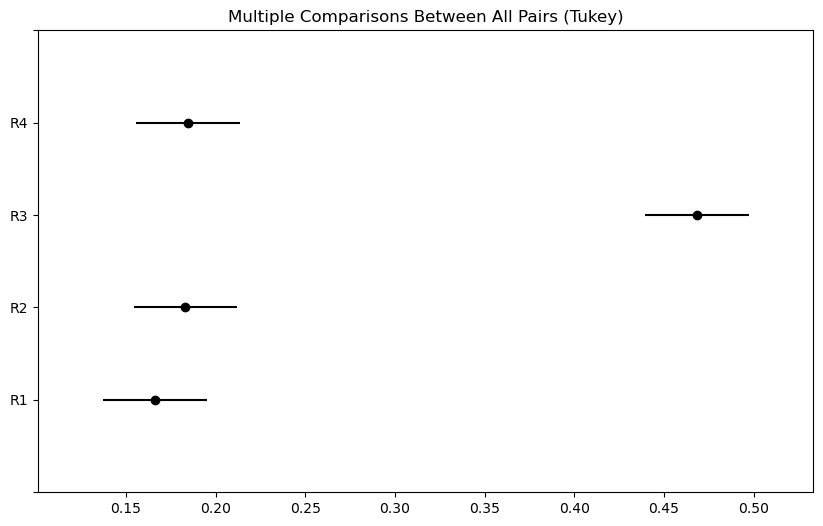

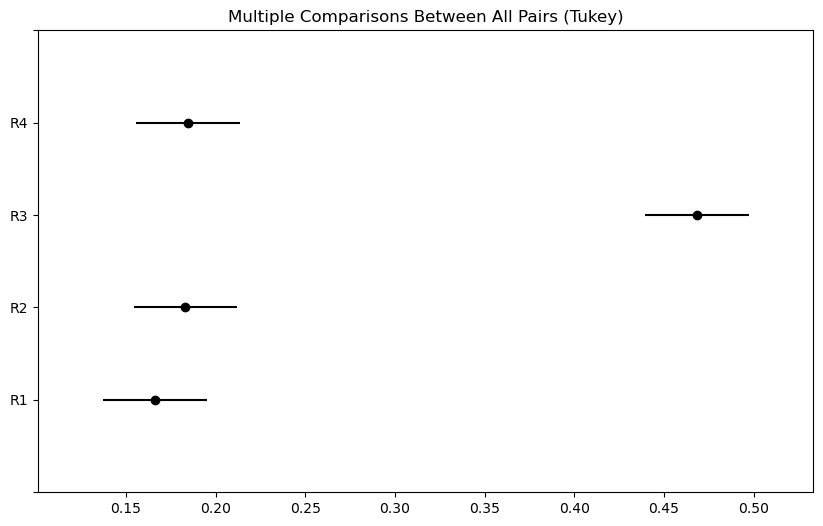

In [47]:
print("Capsid_fraction\n")
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    df["Capsid_fraction"], df["Domain"], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()  # Visualize results

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Mixed-effects model: Domain as fixed effect, Seed/Model as random effects
model = smf.mixedlm(
    "N_terminal_fraction ~ Domain", 
    df, 
    groups=df["Seed"]  # Group by seed
).fit()

print(model.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: N_terminal_fraction
No. Observations: 2120    Method:             REML               
No. Groups:       105     Scale:              0.1787             
Min. group size:  20      Log-Likelihood:     -1268.8890         
Max. group size:  40      Converged:          Yes                
Mean group size:  20.2                                           
-------------------------------------------------------------------
               Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.603      0.025   24.266   0.000    0.554    0.651
Domain[T.R2]   -0.132      0.026   -5.089   0.000   -0.183   -0.081
Domain[T.R3]   -0.176      0.026   -6.766   0.000   -0.227   -0.125
Domain[T.R4]   -0.073      0.026   -2.821   0.005   -0.124   -0.022
Group Var       0.029      0.013                                   



/var/folders/sq/hv1_dwz10cx9mcwy54fj3st40000gn/T/ipykernel_17101/4199820753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Domain", y="N_terminal_fraction", data=df, palette="Set3")


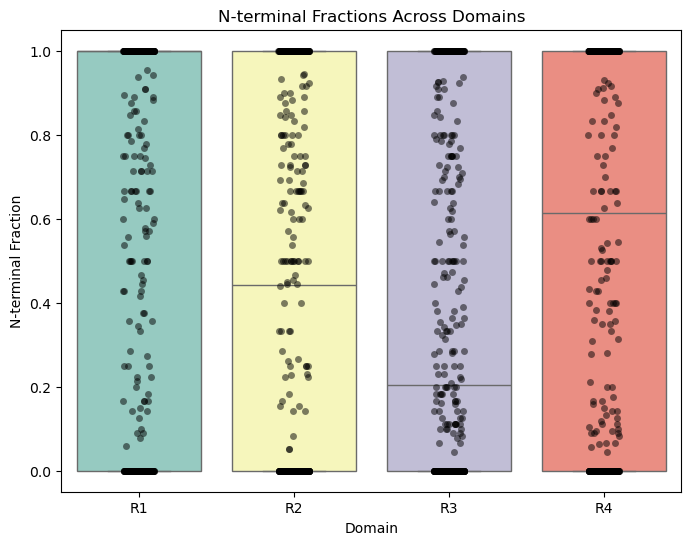

/var/folders/sq/hv1_dwz10cx9mcwy54fj3st40000gn/T/ipykernel_17101/4199820753.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Domain", y="Capsid_fraction", data=df, palette="Set3")


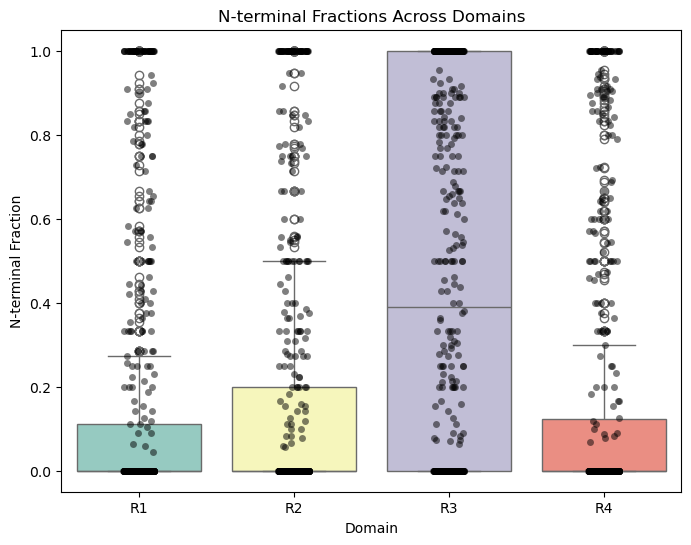

In [49]:
#Check consinstency with previous join barplot: errors can't be that high !

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of N_terminal_fraction by Domain
plt.figure(figsize=(8, 6))
sns.boxplot(x="Domain", y="N_terminal_fraction", data=df, palette="Set3")
sns.stripplot(x="Domain", y="N_terminal_fraction", data=df, color="black", alpha=0.5, jitter=True)
plt.title("N-terminal Fractions Across Domains")
plt.xlabel("Domain")
plt.ylabel("N-terminal Fraction")
plt.show()


# Boxplot of Capsid fraction by Domain (almost complementary)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Domain", y="Capsid_fraction", data=df, palette="Set3")
sns.stripplot(x="Domain", y="Capsid_fraction", data=df, color="black", alpha=0.5, jitter=True)
plt.title("N-terminal Fractions Across Domains")
plt.xlabel("Domain")
plt.ylabel("N-terminal Fraction")
plt.show()

# We want to analyze this patterns after a transient in the dynamics

In particular we want to see if they converge and in case if the new structure can generate a capsid

# Sequence alignement between ARC Human and ARC Drosophila

In [92]:
sequence= "MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERELKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVFYRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAAGELPGQEPAEAQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWLSQIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQYSEGTLSREAIQRELDLPQKQGEPLDQFLWRKRDLYQTLYVDADEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVQDDLEQAAEPAGPHLPVEDEAETLTPAPNSESVASDRTQPE"
# Function to divide the sequence into chunks of 60
def chunk_sequence(seq, chunk_size=60):
    return [seq[i:i+chunk_size] for i in range(0, len(seq), chunk_size)]

# Divide the sequence into chunks of 60 characters
chunks = chunk_sequence(sequence)

# Print the chunks
for i, chunk in enumerate(chunks, start=1):
    print(f"{i:02}: {chunk}")

len("---------IE------------AVRAAAVAGAGSAAA----------------------")

01: MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERE
02: LKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVF
03: YRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAA
04: GELPGQEPAEAQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWLS
05: QIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQYSEGTLSREAIQRELDLPQKQGEPLDQ
06: FLWRKRDLYQTLYVDADEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVQDDLE
07: QAAEPAGPHLPVEDEAETLTPAPNSESVASDRTQPE


60

We want to determine if the combined structure of ARC and TAU will be compatible with a capsid structure.
However experimental results are available only for DROME [https://www.rcsb.org/structure/6TAP].
We can in any case exploit those results applying sequence alignement (courtesy of Clustal omega) and compare the mapped domains (for instance we applied RMSD)

In [93]:
# Sequence alignment between human ARC and Drosophila ARC1

# Human ARC sequence
# Sequence alignment between human ARC and Drosophila ARC1

# Human ARC sequence
# Sequence alignment between human ARC and Drosophila ARC1

# Human ARC sequence


#Fare check sequences !!!!!!
#Use 2 sequence alignemnet ????
""""

human_arc = [
    "MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERE",
    "LKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVF",
    "YRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAA",
    "GELPGQEPAE-AQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWL",
    "SQIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQY-SEGTLSREAIQRELDLPQKQGEPL",
    "DOFLWRKRDLYQTLYVDA-DEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVOD",
    "DLEQAAE-------PAGPHLPVEDAEETLTP--APSNESVASSDRTQPE---"
]

# Drosophila ARC1 sequence
arc1_drome = [
    "------------------------------------------------------------",
    "-----------------------------------------MAQLTQMTNEQ---LREL-",
    "---------IE------------AVRAAAVAGAGSAAA---------------------A",
    "G---GADASRGKGNESACTHSFG-------GTRDHDVVEEFIGNIETYKDVEGISDENAL",
    "KGISLLFYGMASTWWQGVRKEATTWKEAIALIREHESPTKPAYQIYMEFFQNKQDDHDPI",
    "DTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEH",
    "NNQEDEEQLATAKNTRGSKRTTRCTYCSFRGHTFDNCRKRQKDRQEEQHEE"
]


# Flattening the arrays for direct comparison
human_arc_flat = "".join(human_arc)
arc1_drome_flat = "".join(arc1_drome)

# Example code to compute similarities or generate a formatted alignment
alignment = zip(human_arc_flat, arc1_drome_flat)
alignment_display = ""
for h, d in alignment: 
    if h == d:
        alignment_display += "*"
    else:
        alignment_display += " "

# Printing the alignment for inspection
print("Human ARC:")
print(human_arc_flat)
print("Drosophila ARC1:")
print(arc1_drome_flat)
print("Alignment:")
print(alignment_display)
"""

'"\n\nhuman_arc = [\n    "MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERE",\n    "LKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVF",\n    "YRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAA",\n    "GELPGQEPAE-AQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWL",\n    "SQIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQY-SEGTLSREAIQRELDLPQKQGEPL",\n    "DOFLWRKRDLYQTLYVDA-DEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVOD",\n    "DLEQAAE-------PAGPHLPVEDAEETLTP--APSNESVASSDRTQPE---"\n]\n\n# Drosophila ARC1 sequence\narc1_drome = [\n    "------------------------------------------------------------",\n    "-----------------------------------------MAQLTQMTNEQ---LREL-",\n    "---------IE------------AVRAAAVAGAGSAAA---------------------A",\n    "G---GADASRGKGNESACTHSFG-------GTRDHDVVEEFIGNIETYKDVEGISDENAL",\n    "KGISLLFYGMASTWWQGVRKEATTWKEAIALIREHESPTKPAYQIYMEFFQNKQDDHDPI",\n    "DTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEH",\n    "NNQEDEEQLATAKNTRGSKRTTRCTYCSFRGHTFDNC

### Corresponding ids

In [94]:
#check the function

def align_sequences(arc1_drome, model_sequence_human):
    """
    Aligns the arc1_drome sequence with the human model sequence and returns the residue ID mapping.
    
    Parameters:
    - arc1_drome: A list of strings representing the arc sequence with gaps ('-').
    - model_sequence_human: A string representing the human model sequence with no gaps.
    
    Returns:
    - A list of residue IDs corresponding to each element in arc1_drome.
    """
    # Join the drome sequence into a single string
    arc1_drome_sequence = ''.join(arc1_drome)
    model_sequence_human= ''.join( model_sequence_human)
    
    # Remove gaps from the model sequence for proper alignment
    model_sequence = model_sequence_human.replace('-', '')
    
    # Initialize the result list
    residue_ids = []
    
    # Index to track residue ID in the model sequence (after removing gaps)
    model_index = 0
    
    # Iterate over each character in the drome sequence
    for char in arc1_drome_sequence:
        if char == '-':
            # If it's a gap in arc1_drome, append 0 to the result
            residue_ids.append(0)
        else:
            # If it's a residue in arc1_drome, find the corresponding residue in the model sequence
            while model_index < len(model_sequence) and model_sequence[model_index] == '-':
                model_index += 1  # Skip gaps in the model sequence
            if model_index < len(model_sequence):  # Ensure we are within the bounds of the model sequence
                # Add the current model residue ID (position in the model sequence) to the result
                residue_ids.append(model_index + 1)  # +1 for 1-based index
                model_index += 1
            else:
                # If the model sequence is exhausted, append 0 for remaining arc residues
                residue_ids.append(0)
    
    return residue_ids





# Example usage:
arc1_drome = [
    "------------------------------------------------------------",
    "-----------------------------------------MAQLTQMTNEQ---LREL-",
    "---------IE------------AVRAAAVAGAGSAAA---------------------A",
    "G---GADASRGKGNESACTHSFG-------GTRDHDVVEEFIGNIETYKDVEGISDENAL",
    "KGISLLFYGMASTWWQGVRKEATTWKEAIALIREHESPTKPAYQIYMEFFQNKQDDHDPI",
    "DTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEH",
    "NNQEDEEQLATAKNTRGSKRTTRCTYCSFRGHTFDNCRKRQKDRQEEQHEE"
]

arc2_drome= ["------------------------------------------------------------",
             "------------------------------------------------------------",
             "------------------------------------MTQMSDEQFRIFIETIKSLGPIKE",
             "-EPPSKGSFSN-----------CTVRFSGQ-------RDHDAVDEFINAVETYKEVEGIS",
             "DKDALKGLPLLFKSIAVVWWKGVRRDAKTWSDALQLLRDHFSPTKPSYQIYMEIFETKQS",
             "YDEVIDSFICKQRALLAKLPEGRHDEETELDFIYGLMQPKYRESIPRHEVKTFRELLDRG",
             "RTVERTRH------------------------------------"]


model_sequence_drome = [
    "KGNFSACTHSFGGTRDHDVVEEFIGNIETYKDVEGISDENALKGISLLFYGMASTWWQGVRKEATTWKEAIALIREHFSPTKPAYQIYMEFFQNKQDDHDPIDTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEHNN",  # A
    "GKGNFSACTHSFGGTRDHDVVEEFIGNIETYKDVEGISDENALKGISLLFYGMASTWWQGVRKEATTWKEAIALIREHFSPTKPAYQIYMEFFQNKQDDHDPIDTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEHN",  # B
    "GKGNFSACTHSFGGTRDHDVVEEFIGNIETYKDVEGISDENALKGISLLFYGMASTWWQGVRKEATTWKEAIALIREHFSPTKPAYQIYMEFFQNKQDDHDPIDTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEHNN",  # C
    "GKGNFSACTHSFGGTRDHDVVEEFIGNIETYKDVEGISDENALKGISLLFYGMASTWWQGVRKEATTWKEAIALIREHFSPTKPAYQIYMEFFQNKQDDHDPIDTFVIQKRALLAQLPSGRHDEETELDLLFGLLNIKYRKHISRHSVHTFKDLLEQGRIIEHNNQ",  # D
    "TTRCTYCSFRGHTFDNCRKRQKDRQEE"  # E
]

model_sequence_drome2= ["MTQMSDEQFRIFIETIKSLGPIKEEPPSKGSFSNCTVRFSGQRDHDAVDEFINAVETYKEVEGISDKDALKGLPLLFKSIAVVWWKGVRRDAKTWSDALQLLRDHFSPTKPSYQIYMEIFETKQSYDEVIDSFICKQRALLAKLPEGRHDEETELDFIYGLMQPKYRESIPRHEVKTFRELLDRGRTVERTRH"
                        ]


human_arc = [
    "MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERE",
    "LKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVF",
    "YRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAA",
    "GELPGQEPAE-AQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWL",
    "SQIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQY-SEGTLSREAIQRELDLPQKQGEPL",
    "DOFLWRKRDLYQTLYVDA-DEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVOD",
    "DLEQAAE-------PAGPHLPVEDAEETLTP--APSNESVASSDRTQPE---"
]

model_sequence_human = "MELDHRTSGGLHAYPGPRGGQVAKPNVILQIGKCRAEMLEHVRRTHRHLLAEVSKQVERELKGLHRSVGKLESNLDGYVPTSDSQRWKKSIKACLCRCQETIANLERWVKREMHVWREVFYRLERWADRLESTGGKYPVGSESARHTVSVGVGGPESYCHEADGYDYTVSPYAITPPPAAGELPGQEPAEAQQYQPWVPGEDGQPSPGVDTQIFEDPREFLSHLEEYLRQVGGSEEYWLSQIQNHMNGPAKKWWEFKQGSVKNWVEFKKEFLQYSEGTLSREAIQRELDLPQKQGEPLDQFLWRKRDLYQTLYVDADEEEIIQYVVGTLQPKLKRFLRHPLPKTLEQLIQRGMEVQDDLEQAAEPAGPHLPVEDEAETLTPAPNSESVASDRTQPE"

# Get the residue IDs
residue_ids_drome = align_sequences(arc1_drome, model_sequence_drome)
residue_ids_human= align_sequences(human_arc, model_sequence_human)

residue_ids_drome2 = align_sequences(arc2_drome, model_sequence_drome2)

In [95]:
def map_residue_ids(residue_ids_human, residue_ids_drome):
    """
    Maps residue IDs of the human sequence to the corresponding residue IDs of the drome sequence.
    
    Parameters:
    - residue_ids_human: A list of residue IDs corresponding to the human sequence.
    - residue_ids_drome: A list of residue IDs corresponding to the drome sequence.
    
    Returns:
    - A dictionary mapping residue IDs of human to the corresponding residue IDs of drome.
    """
    mapping = {}
    
    for human_id, drome_id in zip(residue_ids_human, residue_ids_drome):
        if human_id != 0:  # Ignore gaps in human sequence
            mapping[human_id] = drome_id
    
    return mapping

In [96]:
# Get the mapping of residue IDs
residue_mapping = map_residue_ids(residue_ids_human, residue_ids_drome)

residue_mapping2 = map_residue_ids(residue_ids_human, residue_ids_drome2)

# Show the mapping
print(residue_mapping)
print(residue_mapping2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 1, 103: 2, 104: 3, 105: 4, 106: 5, 107: 6, 108: 7, 109: 8, 110: 9, 111: 10, 112: 11, 113: 0, 114: 0, 115: 0, 116: 12, 117: 13, 118: 14, 119: 15, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 16, 131: 17, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138

## Importing Drosophila Viral Domain

[https://www.rcsb.org/structure/6TAP]

[https://www.rcsb.org/structure/6TAQ]

In [97]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
from openmm.app import PDBFile, Modeller
from pdbfixer import PDBFixer

# Load PDB file
fixer = PDBFixer(filename='6tap.pdb')

# Add missing (unresolved) residues. We don't want to model anything.
fixer.findMissingResidues()
fixer.missingResidues = {}
# fixer.addMissingResidues()

# Add missing (unresolved) atoms
fixer.findMissingAtoms()
fixer.addMissingAtoms()

# Protonate (roughly) at chosen pH
fixer.addMissingHydrogens(pH=7.0)

# Save the file so it can be inspected
PDBFile.writeFile(fixer.topology, fixer.positions, open("6tap-fixed.pdb", "w"))


### Modelling

Modelling step. Sometimes unnecessary. Here it is needed to remove an "ZN" (ZINC ION) residue.

In [98]:
# There is an "SCN" residue to remove
modeller = Modeller(fixer.topology, fixer.positions)

res_SCN = [r for r in modeller.topology.residues() if r.name == "ZN"]
modeller.delete(res_SCN)

PDBFile.writeFile(
    modeller.topology, modeller.positions, open("6tap-modelled.pdb", "w"), keepIds=True
)

In [99]:
#Renumbering residues ids
input_pdb="6tap-modelled.pdb"
output_pdb="6tap-modelled2.pdb"


from Bio.PDB import PDBParser, PDBIO

def renumber_residues_with_gaps(input_file, output_file, current_global_id = 42):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("structure", input_file)
    
      # current_global_id = 42: Start numbering globally from 1
    
    for model in structure:
        for chain in model:
            for residue in chain:
                # Update the residue ID to a globally unique number
                residue.id = (' ', current_global_id, residue.id[2])  # Preserve insertion code
                current_global_id += 1

    # Save the updated structure
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_file)

# Usage
renumber_residues_with_gaps(input_pdb, output_pdb)


## Structure comparaison (Example: dArc1)

In [100]:
import MDAnalysis as mda
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD

# Paths to PDB files
complex_file = pdb_file[0]  # Path to the human ARC complex
drosophila_file = "6tap-modelled.pdb"  # Path to the Drosophila ARC file

# Load the structures
human_arc = mda.Universe(complex_file)
drosophila_arc = mda.Universe(drosophila_file)

# Get all chain IDs in Drosophila ARC
drosophila_chains = set(atom.segid for atom in drosophila_arc.atoms)

best_rmsd = float("inf")
best_chain = None

for chain in drosophila_chains:
    mapped_residues_human = []
    mapped_residues_drosophila = []
    
    # Iterate over the residue mapping and select corresponding residues
    for human_id, drome_id in residue_mapping.items():
        if human_id != 0 and drome_id != 0:  # Ignore mappings where either ID is zero
            human_residue = human_arc.select_atoms(f"resid {human_id} and chainid A and name CA")
            drosophila_residue = drosophila_arc.select_atoms(f"resid {drome_id} and segid {chain} and name CA")
            if len(human_residue) > 0 and len(drosophila_residue) > 0:
                mapped_residues_human.append(human_residue)
                mapped_residues_drosophila.append(drosophila_residue)
    
    if mapped_residues_human and mapped_residues_drosophila:
        # Merge the selected residues
        human_selection_mapped = mda.Merge(*mapped_residues_human)
        drosophila_selection_mapped = mda.Merge(*mapped_residues_drosophila)

        # Align Drosophila mapped residues to the Human mapped residues
        alignment = AlignTraj(
            drosophila_selection_mapped,  # The Drosophila ARC structure to align
            human_selection_mapped,       # The Human ARC structure as reference
            in_memory=True
        )
        alignment.run()

        # Perform RMSD calculation between the aligned structures
        rmsd_analysis = RMSD(human_selection_mapped, drosophila_selection_mapped)
        rmsd_analysis.run()

        # Extract the RMSD value
        final_rmsd = rmsd_analysis.results.rmsd[-1][2]  # Last frame RMSD value

        # Check if this is the best RMSD so far
        if final_rmsd < best_rmsd:
            best_rmsd = final_rmsd
            best_chain = chain

print(f"Best Drosophila chain: {best_chain}, Minimum RMSD: {best_rmsd:.3f} Å")

Best Drosophila chain: E, Minimum RMSD: 12.646 Å


## Example: dARC2

In [101]:
# Load PDB file
fixer = PDBFixer(filename='6taq.pdb')

# Add missing (unresolved) residues. We don't want to model anything.
fixer.findMissingResidues()
fixer.missingResidues = {}
# fixer.addMissingResidues()

# Add missing (unresolved) atoms
fixer.findMissingAtoms()
fixer.addMissingAtoms()

# Protonate (roughly) at chosen pH
fixer.addMissingHydrogens(pH=7.0)

# Save the file so it can be inspected
PDBFile.writeFile(fixer.topology, fixer.positions, open("6taq-fixed.pdb", "w"))


# There is an "SCN" residue to remove
modeller = Modeller(fixer.topology, fixer.positions)

res_SCN = [r for r in modeller.topology.residues() if r.name == "ZN"]
modeller.delete(res_SCN)

PDBFile.writeFile(
    modeller.topology, modeller.positions, open("6taq-modelled.pdb", "w"), keepIds=True
)

#Renumbering residues ids
input_pdb="6taq-modelled.pdb"
output_pdb="6taq-modelled2.pdb"


renumber_residues_with_gaps(input_pdb, output_pdb, current_global_id = 29)

In [62]:
import MDAnalysis as mda
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD

# Paths to PDB files
complex_file = pdb_file[0]  # Path to the human ARC complex
drosophila_file = "6taq-modelled.pdb"  # Path to the Drosophila ARC file

# Load the structures
human_arc = mda.Universe(complex_file)
drosophila_arc = mda.Universe(drosophila_file)

# Create empty lists to store the mapped residues
mapped_residues_human = []
mapped_residues_drosophila = []

# Iterate over the residue mapping and select corresponding residues
for human_id, drome_id in residue_mapping2.items():
    if human_id != 0 and drome_id != 0:  # Ignore mappings where either ID is zero
        human_residue = human_arc.select_atoms(f"resid {human_id} and chainid A and name CA")
        drosophila_residue = drosophila_arc.select_atoms(f"resid {drome_id} and chainid A and name CA")
        if len(human_residue) > 0 and len(drosophila_residue) > 0:
            mapped_residues_human.append(human_residue)
            mapped_residues_drosophila.append(drosophila_residue)

# Merge the selected residues
human_selection_mapped = mda.Merge(*mapped_residues_human)
drosophila_selection_mapped = mda.Merge(*mapped_residues_drosophila)

# Step 1: Align Drosophila mapped residues to the Human mapped residues
alignment = AlignTraj(
    drosophila_selection_mapped,  # The Drosophila ARC structure to align
    human_selection_mapped,       # The Human ARC structure as reference
    in_memory=True
)
alignment.run()

# Perform RMSD calculation between the aligned structures
rmsd_analysis = RMSD(human_selection_mapped, drosophila_selection_mapped)
rmsd_analysis.run()

# Extract and print the RMSD value
final_rmsd = rmsd_analysis.results.rmsd[-1][2]  # Last frame RMSD value
print(f"RMSD between Human ARC and Drosophila ARC (aligned): {final_rmsd:.3f} Å")

RMSD between Human ARC and Drosophila ARC (aligned): 17.677 Å


## Structure Analysis

In [102]:
def fit_drosophila(complex_file, drosophila_file, residue_mapping):
    # Load the structures
    human_arc = mda.Universe(complex_file)
    drosophila_arc = mda.Universe(drosophila_file)

    # Get all chain IDs in Drosophila ARC
    drosophila_chains = set(atom.segid for atom in drosophila_arc.atoms)

    best_rmsd = float("inf")
    best_chain = None

    for chain in drosophila_chains:
        mapped_residues_human = []
        mapped_residues_drosophila = []
        
        # Iterate over the residue mapping and select corresponding residues
        for human_id, drome_id in residue_mapping.items():
            if human_id != 0 and drome_id != 0:  # Ignore mappings where either ID is zero
                human_residue = human_arc.select_atoms(f"resid {human_id} and chainid A and name CA")
                drosophila_residue = drosophila_arc.select_atoms(f"resid {drome_id} and segid {chain} and name CA")
                if len(human_residue) > 0 and len(drosophila_residue) > 0:
                    mapped_residues_human.append(human_residue)
                    mapped_residues_drosophila.append(drosophila_residue)
        
        if mapped_residues_human and mapped_residues_drosophila:
            # Merge the selected residues
            human_selection_mapped = mda.Merge(*mapped_residues_human)
            drosophila_selection_mapped = mda.Merge(*mapped_residues_drosophila)

            # Align Drosophila mapped residues to the Human mapped residues
            alignment = AlignTraj(
                drosophila_selection_mapped,  # The Drosophila ARC structure to align
                human_selection_mapped,       # The Human ARC structure as reference
                in_memory=True
            )
            alignment.run()

            # Perform RMSD calculation between the aligned structures
            rmsd_analysis = RMSD(human_selection_mapped, drosophila_selection_mapped)
            rmsd_analysis.run()

            # Extract the RMSD value
            final_rmsd = rmsd_analysis.results.rmsd[-1][2]  # Last frame RMSD value

            # Check if this is the best RMSD so far
            if final_rmsd < best_rmsd:
                best_rmsd = final_rmsd
                best_chain = chain

#    print(f"Best Drosophila chain: {best_chain}, Minimum RMSD: {best_rmsd:.3f} Å")
    return best_chain, best_rmsd

We now analyse the RMSD for both structures and observe which chain fits better

In [113]:
drosophila_file = "6tap-modelled.pdb" 
drosophila_file2 = "6taq-modelled.pdb" 
dArc1=[]
dArc2=[]
for file in pdb_file: #pdb_files_model
    dArc1.append(fit_drosophila(file,drosophila_file,residue_mapping))
    dArc2.append(fit_drosophila(file,drosophila_file2,residue_mapping2))

For dArc1 78 structures over 106 align with chain E
For dArc1 99 structures over 106 align with chain C


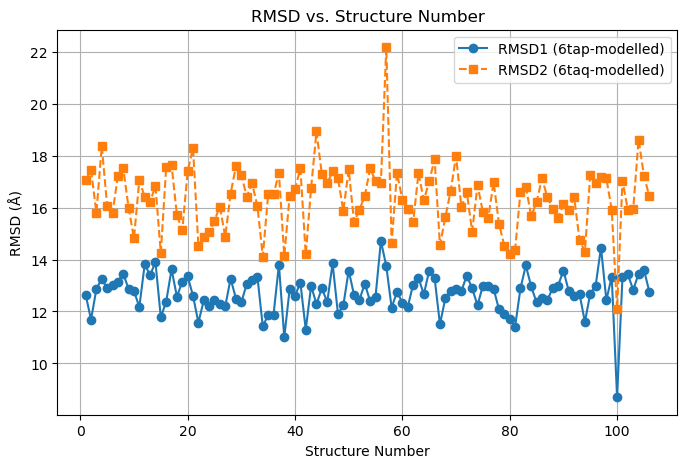

In [114]:
chain1=[dArc1[i][0] for i in range(len(dArc1))]
chain2=[dArc2[i][0] for i in range(len(dArc2))]
RMSD1=[dArc1[i][1] for i in range(len(dArc1))]
RMSD2 = [dArc2[i][1] for i in range(len(dArc2))]
count_E = chain1.count("E")
count_C2 = chain2.count("C")
print(f"For dArc1 {count_E} structures over {len(chain1)} align with chain E")
print(f"For dArc1 {count_C2} structures over {len(chain2)} align with chain C")

# Generate structure numbers (assuming sequential order)
structure_numbers = list(range(1, len(RMSD1) + 1))

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(structure_numbers, RMSD1, marker='o', linestyle='-', label='RMSD1 (6tap-modelled)')
plt.plot(structure_numbers, RMSD2, marker='s', linestyle='--', label='RMSD2 (6taq-modelled)')

# Labels and title
plt.xlabel("Structure Number")
plt.ylabel("RMSD (Å)")
plt.title("RMSD vs. Structure Number")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

We clearly see that the best fitted structure is 6tap (dARC1).

We now rerun the calculations, but only for dARC1 and chain E (to ensure consistency)

In [69]:
def fit_best_drosophila_chain(complex_file, drosophila_file="6tap-modelled.pdb" , residue_mapping=residue_mapping):
    # Load the structures
    human_arc = mda.Universe(complex_file)
    drosophila_arc = mda.Universe(drosophila_file)

    best_rmsd = float("inf")
    best_chain = "E"  # Always align to chain E

    mapped_residues_human = []
    mapped_residues_drosophila = []
    
    # Iterate over the residue mapping and select corresponding residues
    for human_id, drome_id in residue_mapping.items():
        if human_id != 0 and drome_id != 0:  # Ignore mappings where either ID is zero
            human_residue = human_arc.select_atoms(f"resid {human_id} and chainid A and name CA")
            drosophila_residue = drosophila_arc.select_atoms(f"resid {drome_id} and segid {best_chain} and name CA")
            if len(human_residue) > 0 and len(drosophila_residue) > 0:
                mapped_residues_human.append(human_residue)
                mapped_residues_drosophila.append(drosophila_residue)
    
    if mapped_residues_human and mapped_residues_drosophila:
        # Merge the selected residues
        human_selection_mapped = mda.Merge(*mapped_residues_human)
        drosophila_selection_mapped = mda.Merge(*mapped_residues_drosophila)

        # Align Drosophila mapped residues to the Human mapped residues
        alignment = AlignTraj(
            drosophila_selection_mapped,  # The Drosophila ARC structure to align
            human_selection_mapped,       # The Human ARC structure as reference
            in_memory=True
        )
        alignment.run()

        # Perform RMSD calculation between the aligned structures
        rmsd_analysis = RMSD(human_selection_mapped, drosophila_selection_mapped)
        rmsd_analysis.run()

        # Extract the RMSD value
        best_rmsd = rmsd_analysis.results.rmsd[-1][2]  # Last frame RMSD value

#    print(f"Aligned to Chain E, Minimum RMSD: {best_rmsd:.3f} Å")
    return best_rmsd

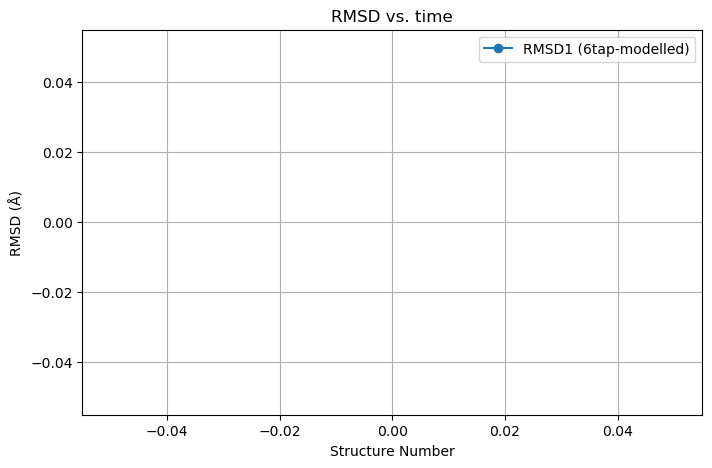

In [220]:
# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(structure_numbers, dArc1_final, marker='o', linestyle='-', label='RMSD1 (6tap-modelled)')

# Labels and title
plt.xlabel("Structure Number")
plt.ylabel("RMSD (Å)")
plt.title("RMSD vs. time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [67]:
print("mean: ", np.mean(dArc1_final))
print("standard deviation: ", np.std(dArc1_final))

mean:  13.017953260150668
standard deviation:  0.62301426573073


# Secondary structure analysis

In [68]:
print(pdb_file)

['Folds/arc_tau_seed2/fold_arc_tau_seed2_model_0.pdb', 'Folds/arc_tau_seed3/fold_arc_tau_seed3_model_0.pdb', 'Folds/arc_tau_seed4/fold_arc_tau_seed4_model_0.pdb', 'Folds/arc_tau_seed5/fold_arc_tau_seed5_model_0.pdb', 'Folds/arc_tau_seed6/fold_arc_tau_seed6_model_0.pdb', 'Folds/arc_tau_seed7/fold_arc_tau_seed7_model_0.pdb', 'Folds/arc_tau_seed8/fold_arc_tau_seed8_model_0.pdb', 'Folds/arc_tau_seed9/fold_arc_tau_seed9_model_0.pdb', 'Folds/arc_tau_seed10/fold_arc_tau_seed10_model_0.pdb', 'Folds/arc_tau_seed11/fold_arc_tau_seed11_model_0.pdb', 'Folds/arc_tau_seed12/fold_arc_tau_seed12_model_0.pdb', 'Folds/arc_tau_seed13/fold_arc_tau_seed13_model_0.pdb', 'Folds/arc_tau_seed14/fold_arc_tau_seed14_model_0.pdb', 'Folds/arc_tau_seed15/fold_arc_tau_seed15_model_0.pdb', 'Folds/arc_tau_seed16/fold_arc_tau_seed16_model_0.pdb', 'Folds/arc_tau_seed17/fold_arc_tau_seed17_model_0.pdb', 'Folds/arc_tau_seed18/fold_arc_tau_seed18_model_0.pdb', 'Folds/arc_tau_seed19/fold_arc_tau_seed19_model_0.pdb', 'Folds/

# Ramachendran angles ?

# Final configurations analysis

After we run simulation we analysize what are the major changes in the structure

Due to computational limitation here statistical analysis could not be applied in a meaningful way

## Domain angles

In [27]:
import os
import glob
import re

# Path to the Results directory
results_dir = "Results"

# Find all folders inside Results matching the pattern
folders = glob.glob(os.path.join(results_dir, "sol_fold_arc_tau_seed*"))

# Regular expression to extract seed and model number
folder_pattern = r"sol_fold_arc_tau_seed(\d+)_model_(\d+)"

for folder in folders:
    # Match the folder name using the pattern
    match = re.search(folder_pattern, os.path.basename(folder))
    
    if match:
        # Extract seed and model number
        seed = match.group(1)
        model = match.group(2)
        
        # Construct the full path to the output_wrapped.pdb file
        filename = os.path.join(folder, "output_wrapped.pdb")

        if os.path.exists(filename):
            print(f"Processing Seed: {seed}, Model: {model}, File: {filename}")
        else:
            print(f"File not found: {filename}")
    else:
        print(f"Folder {folder} doesn't match expected pattern.")

Processing Seed: 416917, Model: 4, File: Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/output_wrapped.pdb
Processing Seed: 260587, Model: 3, File: Results/sol_fold_arc_tau_seed260587_model_3/output_wrapped.pdb
Processing Seed: 316612, Model: 0, File: Results/sol_fold_arc_tau_seed316612_model_0/output_wrapped.pdb
Processing Seed: 802990, Model: 0, File: Results/sol_fold_arc_tau_seed802990_model_0/output_wrapped.pdb
Processing Seed: 416917, Model: 4, File: Results/sol_fold_arc_tau_seed416917_model_4/output_wrapped.pdb


In [28]:
def get_angle(filename):
    # Define the ranges for the domains
    n_terminal = range(17, 155)
    capsid = range(205, 365)
        
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", filename)

    # Extract coordinates for the two domains
    n_coords = coordinates(structure, n_terminal)  # Define `coordinates` function
    c_coords = coordinates(structure, capsid)

    # Compute principal axes
    n_axis = principal_axis(n_coords)  # Define `principal_axis` function
    c_axis = principal_axis(c_coords)

    # Compute angle between the axes
    angle = domain_angle(n_axis, c_axis)  # Define `domain_angle` function
    return angle

In [44]:
sim_seeds=["416917", "316612", "802990", "260587"]
sim_models=["4","0","0","3"]

# Define the ranges for the domains
n_terminal = range(17, 155)
capsid = range(205, 365)

# Initialize a dictionary to store angles for each seed
angles_dict = {seed: [] for seed in random_seeds}

# Initialize a list to store all angles
angles_i = [] #angles at the beginning
angles_f = [] #angles at the end

#Initialize list of files (will be useful later)
input_files=[]
output_files=[]
trajectories_files=[]

# Loop through pdb files and compute angles
for seed, model in zip(sim_seeds,sim_models):
    filename_i = f'Folds/arc_tau_seed{seed}/fold_arc_tau_seed{seed}_model_{model}.pdb'
    if seed=="416917":
        filename_f = f'Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/output_wrapped.pdb' # f'Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/output_wrapped.pdb'  Considering the longest time simulation
        trajectory_file= f'Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/wrapped.dcd'
    else:
        filename_f = f'Results/sol_fold_arc_tau_seed{seed}_model_{model}/output_wrapped.pdb'
        trajectory_file= f'Results/sol_fold_arc_tau_seed{seed}_model_{model}/wrapped.dcd'
    input_files.append(filename_i)
    output_files.append(filename_f)
    trajectories_files.append(trajectory_file)
    
    angles_i.append(get_angle(filename_i))
    angles_f.append(get_angle(filename_f))

# Convert total_angles to a NumPy array
angles_i = np.array(angles_i)
angles_f = np.array(angles_f)

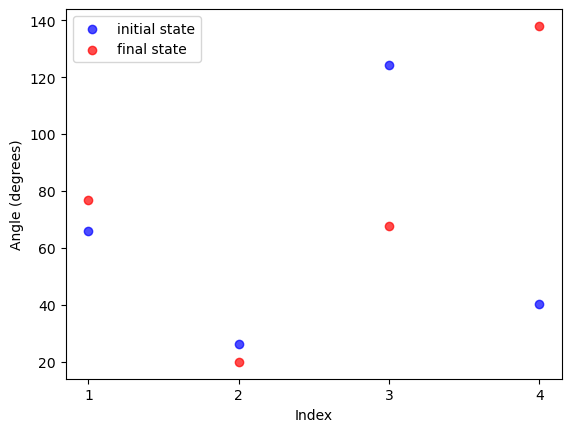

In [46]:
from matplotlib.ticker import MaxNLocator

# Define the x-axis values
x_values = np.arange(len(angles_i))+1

# Create the plot
plt.scatter(x_values, angles_i, label="initial state", color='blue', alpha=0.7)
plt.scatter(x_values, angles_f, label="final state", color='red', alpha=0.7)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Angle (degrees)')
#plt.title('Scatter Plot of angles before and after the simulation')

# Set x-axis and y-axis ticks to integer values only
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Add a legend
plt.legend()

#plt.grid()

# Display the plot
plt.show()

In [37]:
get_angle("Results/Trajectories/1/Output_frames/frame_100.pdb")

79.61357121803329

In [ ]:
"""
total_angles = []
for seed, model in zip(sim_seeds, sim_models):
    print(seed, model)
    
    filename_i = f'Results/sol_fold_arc_tau_seed{seed}_model_{model}/output_wrapped.pdb'
    filename_f = f'Folds/arc_tau_seed{seed}/fold_arc_tau_seed{seed}_model_{model}.pdb'  # Ensure this is defined

    angles_i.append(get_angle(filename_i))
    angles_f.append(get_angle(filename_f))
    
"""


416917 4


AttributeError: 'numpy.ndarray' object has no attribute 'append'

## Contact patterns

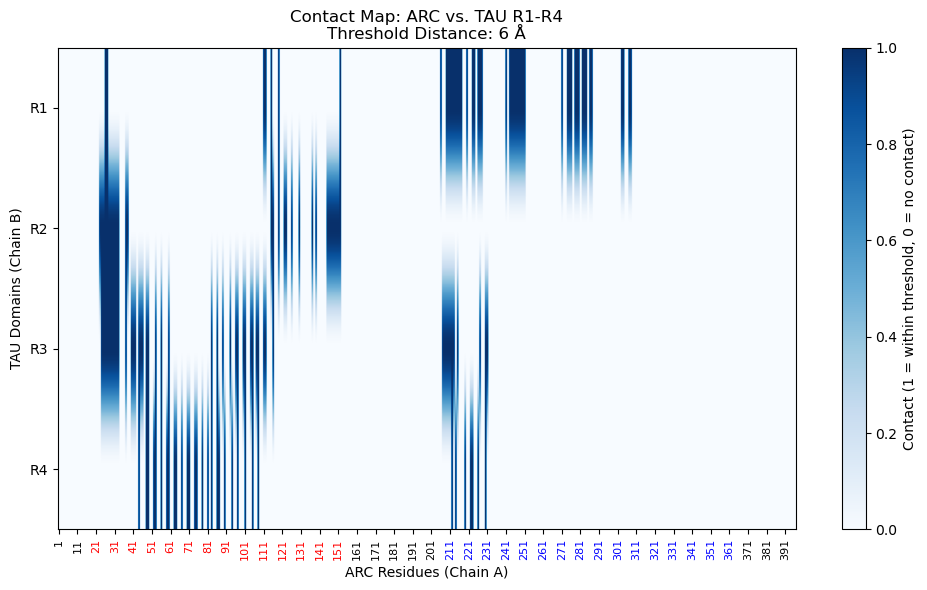

In [79]:
generate_contact_map(input_files[1], 6)

### Difference in the contact patterns:


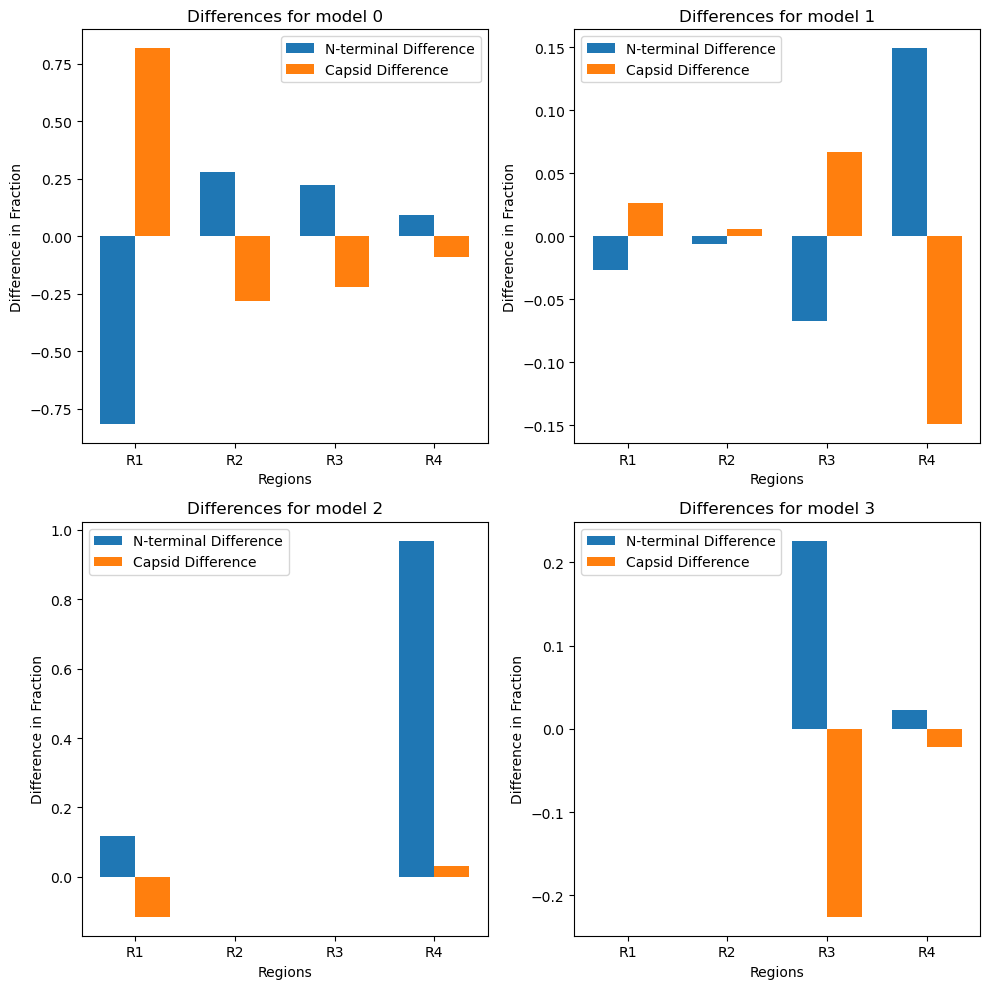

In [80]:
num_plots = len(input_files)
num_cols = 2  # Number of columns in the grid
num_rows = int(np.ceil(num_plots / num_cols))  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))
axs = axs.flatten()  # Flatten the array of axes for easy iteration



for i, (input_file, output_file) in enumerate(zip(input_files, output_files)):
    initial_fractions = compute_interaction_fractions(input_file, 6)
    final_fractions = compute_interaction_fractions(output_file, 6)

    regions = initial_fractions.keys()
    n_terminal_diff = []
    capsid_diff = []

    for region in regions:
        n_terminal_diff.append(final_fractions[region]['N-terminal_fraction'] - initial_fractions[region]['N-terminal_fraction'])
        capsid_diff.append(final_fractions[region]['Capsid_fraction'] - initial_fractions[region]['Capsid_fraction'])

    x = np.arange(len(regions))  # Label locations
    width = 0.35  # Width of the bars

    ax = axs[i]
    ax.bar(x - width/2, n_terminal_diff, width, label='N-terminal Difference')
    ax.bar(x + width/2, capsid_diff, width, label='Capsid Difference')

    ax.set_xlabel('Regions')
    ax.set_ylabel('Difference in Fraction')
    ax.set_title(f'Differences for model {i}')
    ax.set_xticks(x)
    ax.set_xticklabels(regions)
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [81]:
compute_interaction_fractions(output_files[0], 6)

{'R1': {'N-terminal_fraction': 0.12742382271468145,
  'Capsid_fraction': 0.8725761772853186},
 'R2': {'N-terminal_fraction': 0.9940476190476191,
  'Capsid_fraction': 0.005952380952380952},
 'R3': {'N-terminal_fraction': 0.6858108108108109,
  'Capsid_fraction': 0.3141891891891892},
 'R4': {'N-terminal_fraction': 0.9203980099502488,
  'Capsid_fraction': 0.07960199004975124}}

## Final fit with Drosophila

We now compare the initial to the final fit with drosophila to see how if the structure is still capable to form a viral capsid

In [120]:
dArc1_initial=[]
dArc1_final=[]

for file_i,file_f in zip(input_files,output_files):
    dArc1_initial.append(fit_best_drosophila_chain(file_i))
    dArc1_final.append(fit_best_drosophila_chain(file_f))

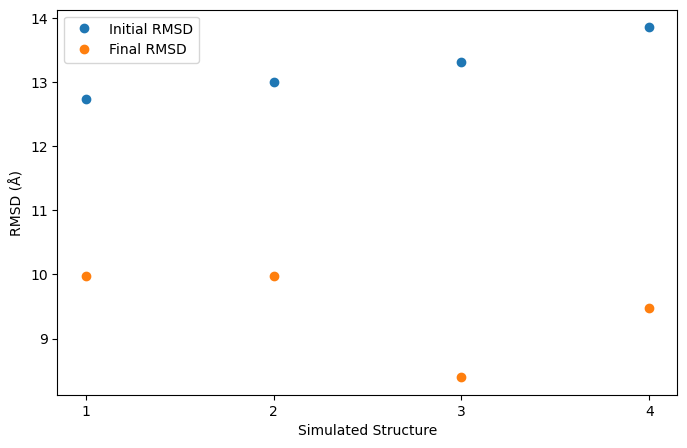

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 5))

# Plot both initial and final RMSD values
x_values = np.arange(1, len(dArc1_initial) + 1)  # Structure numbers
plt.plot(x_values, dArc1_initial, marker='o', linestyle='', label="Initial RMSD")
plt.plot(x_values, dArc1_final, marker='o', linestyle='', label="Final RMSD")

# Force integer ticks on x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Labels and title
plt.xlabel("Simulated Structure")
plt.ylabel("RMSD (Å)")
#plt.title("RMSD vs. Structure Number")
plt.legend()
plt.show()

Let's analysize what happens as time varies:

In [123]:
import MDAnalysis as mda
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.align import AlignTraj

def analyze_rmsd_over_time(complex_file, trajectories_files, drosophila_file="6tap-modelled.pdb", residue_mapping=residue_mapping, T=4):
    if residue_mapping is None:
        print("Residue mapping is not provided.")
        return

    # Load the structure with MDAnalysis (exclude water molecules)
    human_arc = mda.Universe(complex_file)
    drosophila_arc = mda.Universe(drosophila_file)
    
    # Exclude water molecules (assuming water is named 'SOL')
    human_arc = human_arc.select_atoms("not resname SOL")  # Exclude water molecules in human ARC
    drosophila_arc = drosophila_arc.select_atoms("not resname SOL")  # Exclude water in drosophila structure
    
    best_chain = "E"  # Always align to chain E
    mapped_residues_human = []
    mapped_residues_drosophila = []
    
    # Iterate over the residue mapping and select corresponding residues
    for human_id, drome_id in residue_mapping.items():
        if human_id != 0 and drome_id != 0:  # Ignore mappings where either ID is zero
            human_residue = human_arc.select_atoms(f"resid {human_id} and chainid A and name CA")
            drosophila_residue = drosophila_arc.select_atoms(f"resid {drome_id} and segid {best_chain} and name CA")
            if len(human_residue) > 0 and len(drosophila_residue) > 0:
                mapped_residues_human.append(human_residue)
                mapped_residues_drosophila.append(drosophila_residue)
    
    if not mapped_residues_human or not mapped_residues_drosophila:
        print("No valid residues mapped.")
        return
    
    # Merge the selected residues
    human_selection_mapped = mda.Merge(*mapped_residues_human)
    drosophila_selection_mapped = mda.Merge(*mapped_residues_drosophila)
    
    # Define colors for different time steps
    colors = plt.cm.viridis(np.linspace(0, 1, T))
    
    plt.figure(figsize=(8, 5))
    
    for i, traj_file in enumerate(trajectories_files):
        # Load trajectory with MDTraj (exclude water molecules)
        traj = md.load(traj_file, top=complex_file)  # Use complex_file as topology
        traj = traj.atom_slice(traj.topology.select("not water"))  # Exclude water molecules in the trajectory
        
        # Align trajectory with reference using MDAnalysis
        alignment = AlignTraj(traj, human_selection_mapped, in_memory=True)
        alignment.run()
        
        # Compute RMSD using MDTraj at different time steps
        rmsd_values = []
        for t in range(0, traj.n_frames, int(traj.n_frames / T)):
            rmsd = md.rmsd(traj, traj, t0=0, frame=t)
            rmsd_values.append(rmsd[0])
        
        # Plot RMSD values over time
        time_indices = np.linspace(0, len(rmsd_values) - 1, T, dtype=int, endpoint=False)
        for j, t in enumerate(time_indices):
            plt.plot(range(len(rmsd_values)), rmsd_values, label=f"Time {j+1}/{T} - {traj_file}", color=colors[j])
    
    plt.xlabel("Frame")
    plt.ylabel("RMSD (Å)")
    plt.title("RMSD Over Time for Different Trajectories")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("RMSD analysis completed.")

# Processing trajectories

### Wrapping

In [11]:
import mdtraj as mdt
def wrap_trajectory(topology_file, trajectory_file, output_file):
    """
    Wrap a trajectory into the periodic box using MDTraj (aliased as 'mdt').

    Parameters:
        topology_file (str): Path to the topology file (e.g., PDB or PSF).
        trajectory_file (str): Path to the trajectory file (e.g., DCD or XTC).
        output_file (str): Path to save the wrapped trajectory.

    Returns:
        None
    """
    # Load the trajectory
    traj = mdt.load(trajectory_file, top=topology_file)

    # Apply wrapping to bring all atoms into the unit cell
    traj.image_molecules(inplace=True)
 #   traj.superpose(traj, frame=0)  # Align frames to the first frame

    # Save the wrapped trajectory
    traj.save(output_file)
    print(f"Wrapped trajectory saved to {output_file}")



#our files (the number correspond to seed and model correspond to those in sim_seeds and sim_models)
idx=[1,3,1.5]

#size of the timespe for each frame in simulation {ii}
dt= {1: 2*2*1e7/100*1e-6 ,3: 2*1e7/100*1e-6 }#ns

topologies = {}  # Store the topologies
wrapped_traj = {}  # Store the wrapped trajectories

for ii in idx:  # Loop over the trajectories we produced
    topology_file = f"Results/Trajectories/{ii}/complex-minimized.pdb"  # Replace with your topology file
    trajectory_file = f"Results/Trajectories/{ii}/output.dcd"  # Replace with your trajectory file
    output_file = f"Results/Trajectories/{ii}/wrapped.dcd"  # Output trajectory file
    
    wrap_trajectory(topology_file, trajectory_file, output_file)
    
    # Store files in dictionaries
    topologies[ii] = topology_file
    wrapped_traj[ii] = output_file

/opt/anaconda3/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbstructure.py:271: UserWarning: Need to guess residue number string    0 starting from residue34996, atom 242900.
  warnings.warn(f'Need to guess residue number string {num_str} starting from residue{pdbstructure._next_residue_number}, atom {pdbstructure._next_atom_number}.')


Wrapped trajectory saved to Results/Trajectories/1/wrapped.dcd


/opt/anaconda3/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbstructure.py:271: UserWarning: Need to guess residue number string    0 starting from residue34996, atom 211785.
  warnings.warn(f'Need to guess residue number string {num_str} starting from residue{pdbstructure._next_residue_number}, atom {pdbstructure._next_atom_number}.')


Wrapped trajectory saved to Results/Trajectories/3/wrapped.dcd
Wrapped trajectory saved to Results/Trajectories/1.5/wrapped.dcd


In [28]:
for ii in idx: 
    traj=mdt.load(wrapped_traj[ii],top=topologies[ii])
    #Save all frames
    # Loop through each frame in the trajectory
    for i, frame in enumerate(traj):
        # Define the filename for each frame
        filename = f"Results/Trajectories/{ii}/Output_frames/frame_{i+1}.pdb"
        # Save the current frame to a PDB file
        frame.save_pdb(filename)

KeyboardInterrupt: 

## Analyze Compatibility with Drosophila Viral domain over time

In [132]:
import glob

def compute_rmsd_per_frame(snapshot_folder, drosophila_file="6tap-modelled.pdb", residue_mapping=residue_mapping):
    """
    Compute RMSD for each frame in a folder containing PDB snapshots.

    Args:
        snapshot_folder (str): Path to the folder containing frame_{i}.pdb snapshots.
        drosophila_file (str): Reference PDB file for alignment.
        residue_mapping (dict): Dictionary mapping human ARC residues to Drosophila ARC residues.

    Returns:
        dict: RMSD values for each frame.
    """
    snapshots = sorted(glob.glob(f"{snapshot_folder}/frame_*.pdb"))
    
    if not snapshots:
        raise ValueError("No PDB snapshots found in the specified folder.")

    rmsd_values = {}

    for snapshot in snapshots:
        frame_id = int(snapshot.split("_")[-1].split(".")[0])  # Extract frame number
        rmsd = fit_best_drosophila_chain(snapshot, drosophila_file, residue_mapping)
        rmsd_values[frame_id] = rmsd  # Store RMSD for each frame

    return rmsd_values

In [136]:
rmsd_values1=compute_rmsd_per_frame("Results/Trajectories/1/Output_frames")
rmsd_values3=compute_rmsd_per_frame("Results/Trajectories/3/Output_frames")

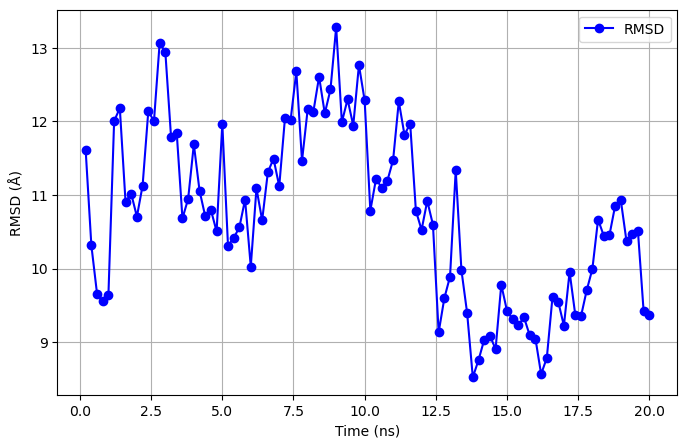

In [137]:
#Plot
import matplotlib.pyplot as plt

# Convert frame numbers to time using dt[1]
frames = sorted(rmsd_values.keys())
times = [frame * dt[3] for frame in frames]
rmsd = [rmsd_values[frame] for frame in frames]

# Plot RMSD over time
plt.figure(figsize=(8, 5))
plt.plot(times, rmsd, marker='o', linestyle='-', color='b', label="RMSD")
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (Å)")
#plt.title("RMSD Over Time")
plt.grid(True)
plt.legend()
plt.show()   

## Evolution analysis

Now we look at the same metrics along a trajectory (for sol_fold_arc_tau_seed416917_model_4)

In [87]:
import os
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
import glob

#generalize the contact functions to the case of multiple frames

def generate_contact_map(snapshot_folder, threshold_distance):
    """
    Generate a contact map to show interactions between ARC (Chain A) and 
    TAU (Chain B), specifically the R1-R4 regions of TAU.

    Args:
        snapshot_folder (str): Path to the folder containing frame_{i}.pdb snapshots.
        threshold_distance (float): Threshold distance in Å to define contacts.

    Returns:
        None: Displays a contact map.
    """
    snapshots = sorted(glob.glob(f"{snapshot_folder}/frame_*.pdb"))
    
    if not snapshots:
        raise ValueError("No PDB snapshots found in the specified folder.")
    
    u = mda.Universe(snapshots[0])  # Load the first snapshot to define structure
    arc = u.select_atoms("byres (protein and segid A)")  # Chain A
    tau = u.select_atoms("byres (protein and segid B)")  # Chain B
    
    r1 = tau.select_atoms("resid 1:30")
    r2 = tau.select_atoms("resid 31:61")
    r3 = tau.select_atoms("resid 62:92")
    r4 = tau.select_atoms("resid 93:126")
    
    tau_domains = [r1, r2, r3, r4]
    domain_names = ["R1", "R2", "R3", "R4"]
    
    n_terminal = range(17, 155)
    capsid = range(205, 365)
    
    contact_map = np.zeros((len(tau_domains), len(arc.residues)))
    
    for snapshot in snapshots:
        u = mda.Universe(snapshot)
        arc = u.select_atoms("byres (protein and segid A)")
        tau = u.select_atoms("byres (protein and segid B)")
        
        for i, domain in enumerate(tau_domains):
            for j, arc_res in enumerate(arc.residues):
                distances = np.linalg.norm(domain.positions[:, np.newaxis] - arc_res.atoms.positions, axis=-1)
                if np.min(distances) < threshold_distance:
                    contact_map[i, j] += 1
    
    contact_map /= len(snapshots)  # Normalize to get fraction of contacts
    
    xticks, xticklabels = [], []
    for i, arc_res in enumerate(arc.residues):
        if i % 10 == 0:
            xticks.append(i)
            color = "red" if arc_res.resid in n_terminal else "blue" if arc_res.resid in capsid else "black"
            xticklabels.append((arc_res.resid, color))
    
    plt.figure(figsize=(10, 6))
    plt.imshow(contact_map, aspect='auto', cmap="Blues", origin='upper')
    plt.colorbar(label="Fraction of Contacts")
    
    ax = plt.gca()
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(res[0]) for res in xticklabels], rotation=90, fontsize=8)
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        label.set_color([res[1] for res in xticklabels][tick // 10])
    
    plt.yticks(ticks=np.arange(len(tau_domains)), labels=domain_names)
    plt.xlabel("ARC Residues (Chain A)")
    plt.ylabel("TAU Domains (Chain B)")
    plt.title(f"Contact Map: ARC vs. TAU R1-R4\nThreshold Distance: {threshold_distance} Å")
    plt.tight_layout()
    plt.show()
    
    
    def compute_interaction_fractions(snapshot_folder, threshold_distance):
    """
    Compute the fraction of interactions for each TAU domain (R1-R4) 
    with the N-terminal and capsid domains of ARC across multiple frames.

    Args:
        snapshot_folder (str): Path to the folder containing frame_{i}.pdb snapshots.
        threshold_distance (float): Threshold distance in Å to define contacts.

    Returns:
        dict: Averaged fractions of interactions for each TAU domain with the 
              N-terminal and capsid domains of ARC across frames.
    """
    snapshots = sorted(glob.glob(f"{snapshot_folder}/frame_*.pdb"))
    
    if not snapshots:
        raise ValueError("No PDB snapshots found in the specified folder.")

    # Initialize dictionary to accumulate fractions
    interaction_fractions = {domain: {"N-terminal_fraction": 0, "Capsid_fraction": 0} 
                             for domain in ["R1", "R2", "R3", "R4"]}
    
    num_frames = len(snapshots)  # Total number of frames

    # Loop over all snapshots
    for snapshot in snapshots:
        u = mda.Universe(snapshot)

        # Select ARC and TAU based on chain identifiers
        arc = u.select_atoms("byres (protein and segid A)")  # Chain A
        tau = u.select_atoms("byres (protein and segid B)")  # Chain B

        # Define TAU's R1-R4 domains
        tau_domains = {
            "R1": tau.select_atoms("resid 1:30"),
            "R2": tau.select_atoms("resid 31:61"),
            "R3": tau.select_atoms("resid 62:92"),
            "R4": tau.select_atoms("resid 93:126")
        }

        # Define ARC's functional domains
        n_terminal = arc.select_atoms("resid 17:155")
        capsid = arc.select_atoms("resid 205:365")

        # Compute interactions for each TAU domain
        for name, domain in tau_domains.items():
            # Interactions with N-terminal
            n_contacts = np.sum(
                np.min(np.linalg.norm(domain.positions[:, np.newaxis] - n_terminal.positions, axis=-1), axis=-1)
                < threshold_distance
            )

            # Interactions with capsid
            capsid_contacts = np.sum(
                np.min(np.linalg.norm(domain.positions[:, np.newaxis] - capsid.positions, axis=-1), axis=-1)
                < threshold_distance
            )

            # Total contacts
            total_contacts = n_contacts + capsid_contacts

            # Update fractions
            if total_contacts > 0:
                interaction_fractions[name]["N-terminal_fraction"] += n_contacts / total_contacts
                interaction_fractions[name]["Capsid_fraction"] += capsid_contacts / total_contacts

    # Average fractions across frames
    for domain in interaction_fractions:
        interaction_fractions[domain]["N-terminal_fraction"] /= num_frames
        interaction_fractions[domain]["Capsid_fraction"] /= num_frames

    return interaction_fractions


END


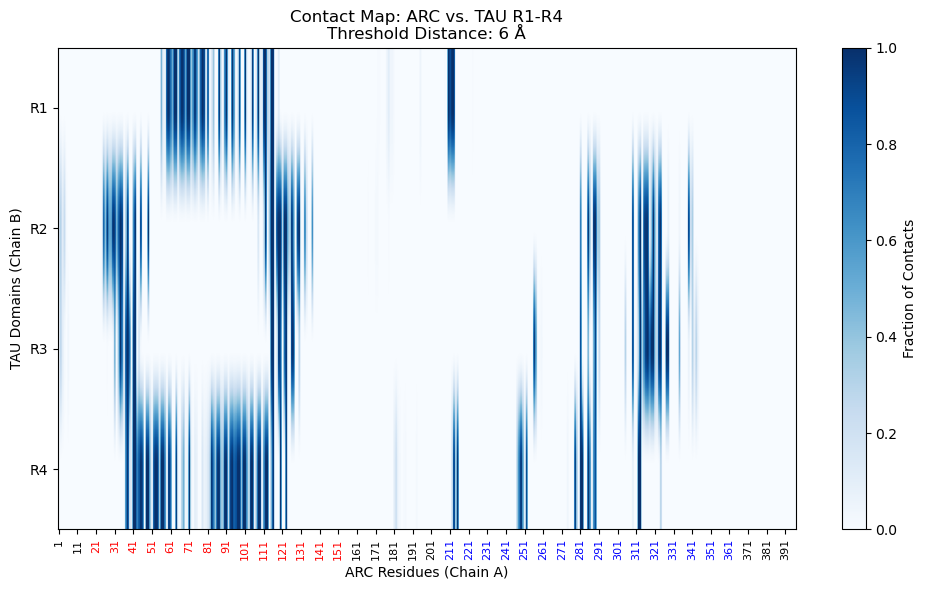

In [ ]:
generate_contact_map("Results/Trajectories/1/Output_frames",6)

In [93]:
#Let's compute the interacting fractions
compute_interaction_fractions("Results/Trajectories/1/Output_frames",6)

{'R1': {'N-terminal_fraction': 0.8864313222289497,
  'Capsid_fraction': 0.11356867777105024},
 'R2': {'N-terminal_fraction': 0.8685293479137524,
  'Capsid_fraction': 0.13147065208624759},
 'R3': {'N-terminal_fraction': 0.38920887752878836,
  'Capsid_fraction': 0.6107911224712115},
 'R4': {'N-terminal_fraction': 0.7903938292176852,
  'Capsid_fraction': 0.2096061707823148}}

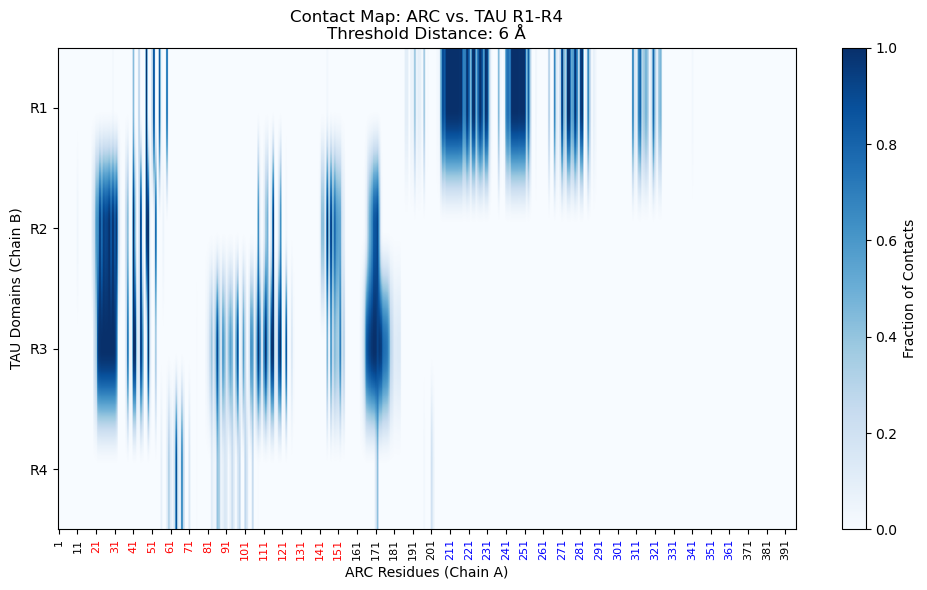

In [90]:
generate_contact_map("Results/Trajectories/3/Output_frames",6)

In [95]:
compute_interaction_fractions("Results/Trajectories/3/Output_frames",6)

{'R1': {'N-terminal_fraction': 0.1646176739465786,
  'Capsid_fraction': 0.835382326053421},
 'R2': {'N-terminal_fraction': 0.999695684355623,
  'Capsid_fraction': 0.0003043156443770748},
 'R3': {'N-terminal_fraction': 1.0, 'Capsid_fraction': 0.0},
 'R4': {'N-terminal_fraction': 0.9816869758405476,
  'Capsid_fraction': 0.008313024159452238}}

## Domain angles in time

!!!!!!!!!!!!!!!!!!

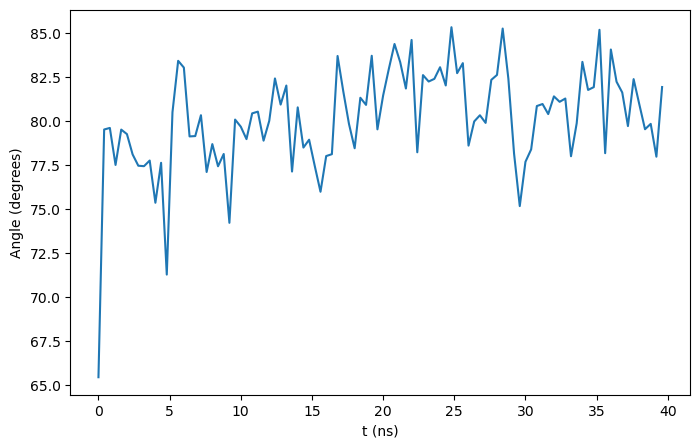

In [ ]:
import os
import matplotlib.pyplot as plt
from Bio import PDB

#Functions to perform clustering of our predictions
def coordinates(structure, residue_range):
    coords = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.id[1] in residue_range:  # Match residue number
                    for atom in residue:
                        coords.append(atom.coord)
    return np.array(coords)

def principal_axis(coords):
    pca = PCA(n_components=1)
    pca.fit(coords)
    return pca.components_[0]

def domain_angle(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip for numerical stability
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

def get_angle(filename):
    # Define the ranges for the domains
    n_terminal = range(17, 155)
    capsid = range(205, 365)
        
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", filename)

    # Extract coordinates for the two domains
    n_coords = coordinates(structure, n_terminal)  # Define `coordinates` function
    c_coords = coordinates(structure, capsid)

    # Compute principal axes
    n_axis = principal_axis(n_coords)  # Define `principal_axis` function
    c_axis = principal_axis(c_coords)

    # Compute angle between the axes
    angle = domain_angle(n_axis, c_axis)  # Define `domain_angle` function
    return angle

def compute_angle_over_time(frames_folder):
    """
    Iterates over the frames in the folder and computes the angle between two domains over time.

    :param frames_folder: The folder containing the PDB files of the frames.
    :return: A list of angles over time and corresponding time (frame) indices.
    """
    # Get the list of PDB files in the folder, sorted in numerical order
    pdb_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.pdb')])

    angles = []
    time = []

    for i, pdb_file in enumerate(pdb_files):
        pdb_path = os.path.join(frames_folder, pdb_file)
        angle = get_angle(pdb_path)
        angles.append(angle)
        time.append(i)  # Time is represented by the frame index (i)

    return time, angles

def plot_angle_over_time(frames_folder):
    """
    Plots the angle between two domains over time.

    :param frames_folder: The folder containing the PDB files of the frames.
    """
    time, angles = compute_angle_over_time(frames_folder)

    return time, angles

# Example usage:
Also
 # Plot the angle over time
frames_folder = "Results/Trajectories/1/Output_frames" 
time, angles=plot_angle_over_time(frames_folder) 

frames_folder3 = "Results/Trajectories/3/Output_frames"
time3, angles3=compute_angle_over_time(frames_folder3)


Text(0, 0.5, 'Angle (degrees)')

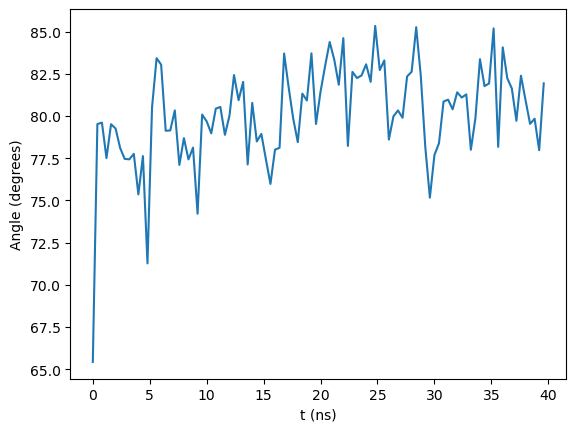

In [24]:
#Plot
plt.figure(figsize=(8, 5))
plt.plot(np.array(time)*dt[1], angles, label="Angle Between Domains")
plt.xlabel('t (ns)')
plt.ylabel('Angle (degrees)')
#plt.title('Angle Between Two Domains Over Time')
#plt.legend()
plt.show()

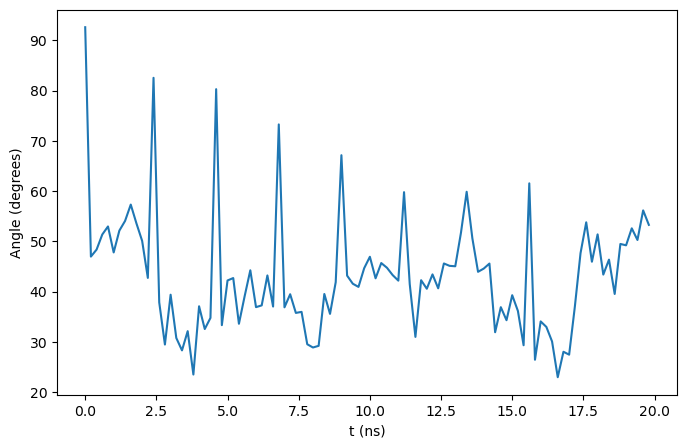

In [ ]:
#Plot results for the other simulation
plt.figure(figsize=(8, 5))
plt.plot(np.array(time3)*dt[3], angles3, label="Angle Between Domains")
plt.xlabel('t (ns)')
plt.ylabel('Angle (degrees)')
plt.show()

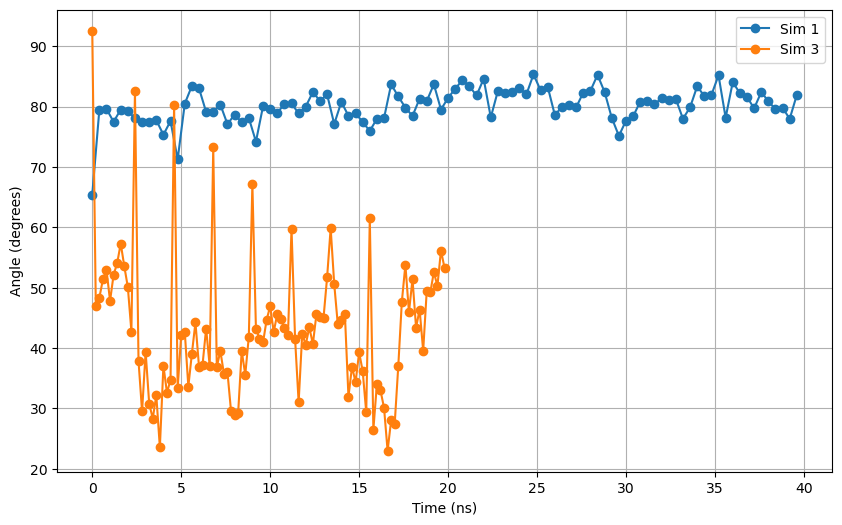

In [55]:
#Plot together
time1_ns = np.array(time) * dt[1]
time3_ns = np.array(time3) * dt[3]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time1_ns, angles, label="Sim 1", marker='o')
plt.plot(time3_ns, angles3, label="Sim 3", marker='o')

# Labels and title
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
#plt.title('Angle Between Domains Over Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Viral Analysis

In [68]:
#We compute the fit for each frame
import glob
import os

# Define the directory path
frames_dir = "Results/Trajectories/1/Output_frames"

# Get all PDB files in the directory
pdb_files = sorted(glob.glob(os.path.join(frames_dir, "*.pdb")))

dArc1_initial=[]
dArc1_final=[]

for pdb_file in pdb_files:
    dArc1_final.append(fit_best_drosophila_chain(pdb_file))

SelectionError: Reference and trajectory atom selections do not contain the same number of atoms: 
atoms:    N_ref=2500, N_traj=25
and also not the same number of residues:
residues: N_ref=2500, N_traj=25

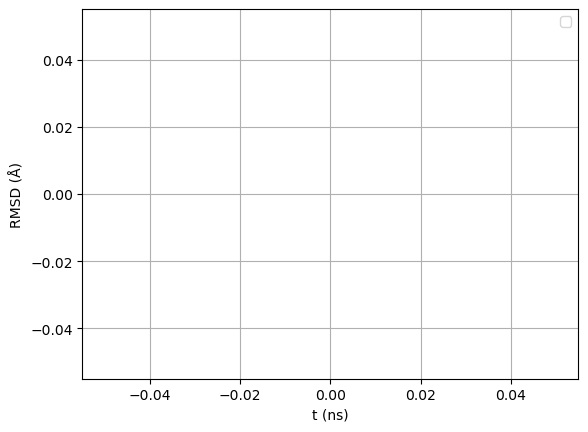

In [185]:
#We plot the results
plt.plot(np.arange(len(dArc1_final))*1e6*2*1e-15*1e8, dArc1_final)
plt.xlabel("t (ns)")
plt.ylabel("RMSD (Å)")
#plt.title("RMSD vs time")
plt.legend()
plt.grid(True)
plt.show()

## Radius of gyration (Rg)

In [86]:
from pymol import cmd
import math

def rgyrate(selection='protein', quiet=1):
    '''
DESCRIPTION

    Radius of gyration

USAGE

    rgyrate [ selection ]
    '''
    try:
        from itertools import izip
    except ImportError:
        izip = zip
    quiet = int(quiet)
    model = cmd.get_model(selection).atom
    x = [i.coord for i in model]
    mass = [i.get_mass() for i in model]
    xm = [(m*i,m*j,m*k) for (i,j,k),m in izip(x,mass)]
    tmass = sum(mass)
    rr = sum(mi*i+mj*j+mk*k for (i,j,k),(mi,mj,mk) in izip(x,xm))
    mm = sum((sum(i)/tmass)**2 for i in izip(*xm))
    rg = math.sqrt(rr/tmass - mm)
    if not quiet:
        print("Radius of gyration: %.2f" % (rg))
    return rg

cmd.extend("rgyrate", rgyrate)

# Use the function to compute Rg over a trajectory

for ii in idx: 
    Rg_values = []
    pdb_files = sorted([f for f in os.listdir(f"Results/Trajectories/{ii}/Output_frames") if f.endswith(".pdb")])

    for pdb in pdb_files:
        cmd.load(os.path.join(f"Results/Trajectories/{ii}/Output_frames", pdb), "protein")
        Rg_values.append(rgyrate("protein"))
        cmd.delete("protein")  # Remove current structure before loading next

    # Compute mean Rg
    mean_rg = np.mean(Rg_values)

    # Plot Rg over time
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange((len(Rg_values))+1)*dt[ii], Rg_values, marker="o", linestyle="-", label="Rg values")
    plt.axhline(mean_rg, color="red", linestyle="--", label=f"Mean Rg = {mean_rg:.2f} Å")
    plt.xlabel("t (ns)")
    plt.ylabel("Rg (Å)")
    plt.title(f"Radius of Gyration Over Time (Trajectory {ii})")
    plt.legend()
    plt.show()

KeyboardInterrupt: 

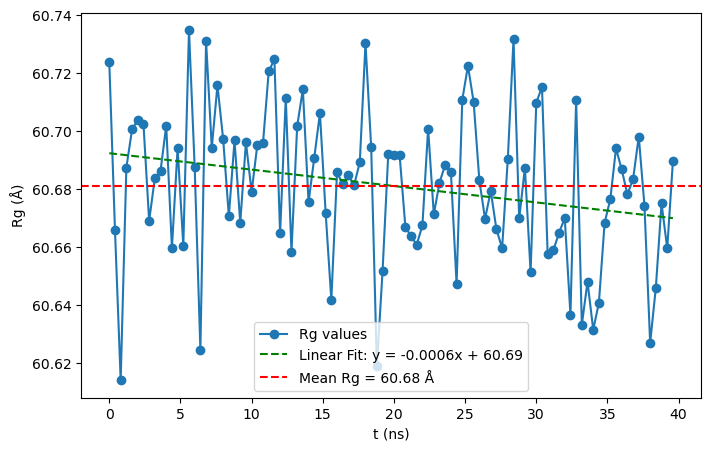

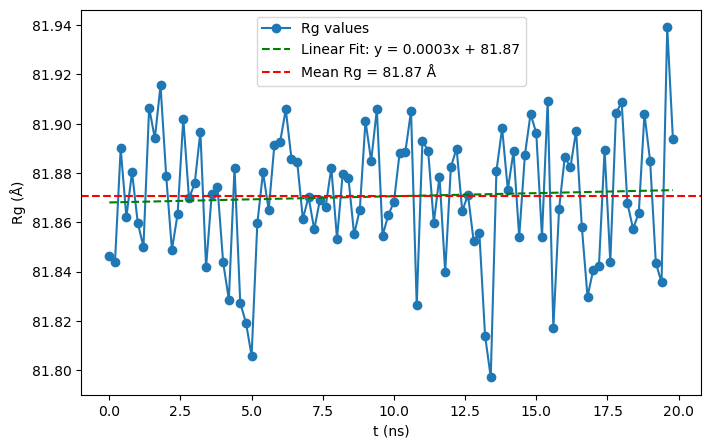

KeyError: 1.5

In [89]:
#trial
import os
import numpy as np
import matplotlib.pyplot as plt
from pymol import cmd

for ii in idx: 
    Rg_values = []
    pdb_files = sorted([f for f in os.listdir(f"Results/Trajectories/{ii}/Output_frames") if f.endswith(".pdb")])

    for pdb in pdb_files:
        cmd.load(os.path.join(f"Results/Trajectories/{ii}/Output_frames", pdb), "protein")
        Rg_values.append(rgyrate("protein"))
        cmd.delete("protein")  # Remove current structure before loading next

    # Compute mean Rg
    mean_rg = np.mean(Rg_values)

    # Time values
    time_values = np.arange(len(Rg_values)) * dt[ii]

    # Compute linear fit
    fit_coeffs = np.polyfit(time_values, Rg_values, 1)  # Linear fit (degree 1)
    fit_line = np.poly1d(fit_coeffs)  # Create polynomial function

    # Plot Rg over time
    plt.figure(figsize=(8, 5))
    plt.plot(time_values, Rg_values, marker="o", linestyle="-", label="Rg values")
    plt.plot(time_values, fit_line(time_values), linestyle="--", color="green", label=f"Linear Fit: y = {fit_coeffs[0]:.4f}x + {fit_coeffs[1]:.2f}")
    plt.axhline(mean_rg, color="red", linestyle="--", label=f"Mean Rg = {mean_rg:.2f} Å")

    # Labels and title
    plt.xlabel("t (ns)")
    plt.ylabel("Rg (Å)")
    #plt.title(f"Radius of Gyration Over Time (Trajectory {ii})")
    plt.legend()
    plt.show()

## Computing RMSF

In [61]:
topology1="Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/complex-minimized.pdb"
trajectory1="Results/sol_fold_arc_tau_seed416917_model_4 2 1E7/wrapped_trial.dcd"

topology3="Results/sol_fold_arc_tau_seed802990_model_0/complex-minimized.pdb"
trajectory3="Results/sol_fold_arc_tau_seed802990_model_0/wrapped.dcd"

In [25]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import warnings

#Function to plot RMSF, given an input simulation: topology and trajectory

def plot_RMSF(topology, trajectory):
    # Suppress warnings
    warnings.filterwarnings('ignore')
    
    # Load the Universe
    u = mda.Universe(topology, trajectory)
    
    def compute_rmsf(chain_id):
        average = align.AverageStructure(u, u, select=f'protein and name CA and chainid {chain_id}', ref_frame=0).run()
        ref = average.results.universe

        align.AlignTraj(u, ref, select=f'protein and name CA and chainid {chain_id}', in_memory=True).run()
        c_alphas = u.select_atoms(f'protein and name CA and chainid {chain_id}')
        R = rms.RMSF(c_alphas).run()
        return c_alphas.resids, R.results.rmsf
    
    # Compute RMSF for Arc (Chain A)
    resids_A, rmsf_A = compute_rmsf('A')
    
    # Compute RMSF for Tau (Chain B)
    resids_B, rmsf_B = compute_rmsf('B')
    
    # Plot for Arc (Chain A)
    plt.figure(figsize=(8, 5))
    plt.plot(resids_A, rmsf_A, label='RMSF')
    plt.xlabel('Residue number')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF for Arc")
    plt.axvspan(17, 155, zorder=0, alpha=0.2, color='orange', label='N-terminal')
    plt.axvspan(205, 365, zorder=0, alpha=0.2, color='green', label='Capsid domain')
    plt.legend()
    plt.show()
    
    # Plot for Tau (Chain B)
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(244,369), rmsf_B, label='RMSF')
    plt.xlabel('Residue number')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF for Tau")
    plt.axvspan(1, 30, zorder=0, alpha=0.2, color='orange', label='R1')
    plt.axvspan(31, 61, zorder=0, alpha=0.2, color='green', label='R2')
    plt.axvspan(62, 92, zorder=0, alpha=0.2, color='purple', label='R3')
    plt.axvspan(93, 126, zorder=0, alpha=0.2, color='grey', label='R4')
    plt.legend()
    plt.show()


In [26]:
plot_RMSF(topology1, trajectory1)
plot_RMSF(topology3, trajectory3)

NameError: name 'topology1' is not defined

## RMSD vs time

In [79]:
#Trial
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import warnings
import os

def plot_RMSD(frames_folder, selection="protein", ref_frame=0):
    warnings.filterwarnings('ignore')

    # Get the list of PDB files in the folder
    pdb_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.pdb')])

    if not pdb_files:
        print("No PDB files found in the folder.")
        return [], []

    # Load the reference structure (first frame)
    ref_pdb = os.path.join(frames_folder, pdb_files[ref_frame])
    u_ref = mda.Universe(ref_pdb)

    # Initialize lists to store RMSD and time
    rmsd_values = []
    time = []

    for i, pdb_file in enumerate(pdb_files):
        pdb_path = os.path.join(frames_folder, pdb_file)
        u_frame = mda.Universe(ref_pdb, pdb_path)  # Load frame

        # Check if the frame has the same number of atoms as the reference
        if len(u_frame.atoms) != len(u_ref.atoms):
            print(f"Warning: Frame {i} has a different number of atoms! ({len(u_frame.atoms)} vs {len(u_ref.atoms)})")

        # Explicitly align each frame to the reference BEFORE computing RMSD
        aligner = align.AlignTraj(u_frame, u_ref, select=selection, in_memory=True)
        aligner.run()

        # Compute RMSD with direct superposition
        rmsd_analysis = rms.RMSD(u_frame, u_ref, select=selection, ref_frame=ref_frame).run()

        # Extract RMSD value
        rmsd_values.append(rmsd_analysis.results.rmsd[0, 2])
        time.append(i)

    # Return RMSD values and frame indices
    return time, rmsd_values

/opt/anaconda3/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


We can do the analysis also on the separate proteins

In [80]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import warnings
import os

def plot_RMSD_separate_chains(frames_folder, ref_frame=0):
    warnings.filterwarnings('ignore')

    # Get the list of PDB files in the folder
    pdb_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.pdb')])

    if not pdb_files:
        print("No PDB files found in the folder.")
        return [], [], []

    # Load the reference structure (first frame)
    ref_pdb = os.path.join(frames_folder, pdb_files[ref_frame])
    u_ref = mda.Universe(ref_pdb)

    # Initialize lists to store RMSD and time for each chain
    rmsd_values_arc = []
    rmsd_values_tau = []
    time = []

    for i, pdb_file in enumerate(pdb_files):
        pdb_path = os.path.join(frames_folder, pdb_file)
        u_frame = mda.Universe(ref_pdb, pdb_path)  # Load frame

        # Check if the frame has the same number of atoms as the reference
        if len(u_frame.atoms) != len(u_ref.atoms):
            print(f"Warning: Frame {i} has a different number of atoms! ({len(u_frame.atoms)} vs {len(u_ref.atoms)})")

        # Explicitly align each frame to the reference BEFORE computing RMSD
        aligner = align.AlignTraj(u_frame, u_ref, select='all', in_memory=True)
        aligner.run()

        # Select atoms for ARC (chain A) and TAU (chain B)
        arc_atoms = u_frame.select_atoms('chainID A')
        tau_atoms = u_frame.select_atoms('chainID B')

        # Compute RMSD for ARC
        rmsd_analysis_arc = rms.RMSD(arc_atoms, u_ref, select='chainID A', ref_frame=ref_frame).run()
        rmsd_values_arc.append(rmsd_analysis_arc.results.rmsd[0, 2])

        # Compute RMSD for TAU
        rmsd_analysis_tau = rms.RMSD(tau_atoms, u_ref, select='chainID B', ref_frame=ref_frame).run()
        rmsd_values_tau.append(rmsd_analysis_tau.results.rmsd[0, 2])

        time.append(i)

    # Return RMSD values and frame indices
    return time, rmsd_values_arc, rmsd_values_tau

In [22]:
for ii in idx:
    time, rmsd_values = plot_RMSD(f"Results/Trajectories/{ii}/Output_frames")

    # Plot RMSD over time
    plt.figure(figsize=(8, 5))
    plt.plot(time*dt[ii], rmsd_values, label='RMSD')
    plt.xlabel('t(ns)')
    plt.ylabel('RMSD ($\AA$)')
    plt.title("RMSD(t)")
    plt.legend()
    plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 800x500 with 0 Axes>

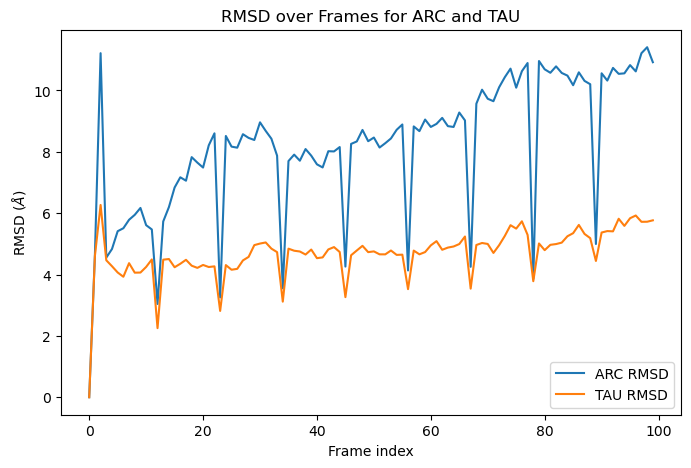

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [0.0,
  4.634709576400879,
  11.216299536669869,
  4.551326797273412,
  4.83221586991262,
  5.412247414154713,
  5.509392489613113,
  5.7851055261190645,
  5.946300520115173,
  6.171098055890945,
  5.609184816115833,
  5.469167724165421,
  3.039672536465732,
  5.729550503780547,
  6.198637070857845,
  6.836640221254589,
  7.170073735135482,
  7.0592195040970935,
  7.827123608734502,
  7.647851997562751,
 

In [9]:
#Separate chains

for ii in idx:
    time, rmsd_values_arc, rmsd_values_tau=plot_RMSD_separate_chains(f"Results/Trajectories/{ii}/Output_frames")

    # Plot RMSD over time for ARC and TAU
    plt.figure(figsize=(8, 5))
    plt.plot(time*dt[ii], rmsd_values_arc, label='ARC RMSD')
    plt.plot(time*dt[ii], rmsd_values_tau, label='TAU RMSD')
    plt.xlabel('Frame index')
    plt.ylabel('RMSD ($\AA$)')
    plt.title("RMSD over Frames for ARC and TAU")
    plt.legend()
    plt.show()

We note the presence of download spikes. Could be this a physical phenomena ? They seem periodic

In [82]:
import numpy as np

def detect_downspikes(rmsd_values, threshold_factor=1.5):
    """
    Detects down spikes in an RMSD time series.

    Parameters:
    rmsd_values (list or np.array): The RMSD values over time.
    threshold_factor (float): Factor multiplied by standard deviation to define a spike.

    Returns:
    spike_indices (list): Indices of detected down spikes.
    spike_values (list): Corresponding RMSD values of the down spikes.
    """

    rmsd_values = np.array(rmsd_values)
    mean_rmsd = np.mean(rmsd_values)
    std_rmsd = np.std(rmsd_values)
    
    # Define a threshold for down spikes
    threshold = mean_rmsd - threshold_factor * std_rmsd

    # Find indices where RMSD is below the threshold and lower than previous & next values
    spike_indices = [i for i in range(1, len(rmsd_values) - 1) 
                     if rmsd_values[i] < threshold and 
                        rmsd_values[i] < rmsd_values[i-1] and 
                        rmsd_values[i] < rmsd_values[i+1]]
    
    spike_values = [rmsd_values[i] for i in spike_indices]

    return spike_indices, spike_values

#Spikes for first trajectory
time, rmsd_values = plot_RMSD(f"Results/Trajectories/1/Output_frames")
spike_indices, spike_values=detect_downspikes(rmsd_values)

In [83]:
print(spike_indices)

[3, 12, 23, 34, 45, 56, 67, 78]


Let's see if the structures are actually different. let's look for instance at angles

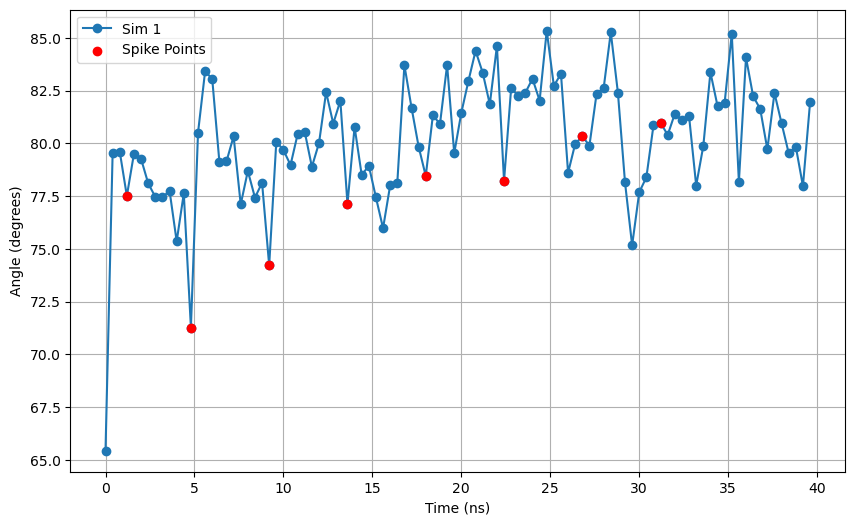

In [84]:
# Plotting the angle data
plt.figure(figsize=(10, 6))
plt.plot(time1_ns, angles, label="Sim 1", marker='o')

# Highlight the spike points
plt.scatter([time1_ns[i] for i in spike_indices], [angles[i] for i in spike_indices], color='red', label="Spike Points", zorder=5)

# Labels and title
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
# plt.title('Angle Between Domains Over Time')  # Uncomment if you'd like a title
plt.legend()
plt.grid(True)

# Display the plot
plt.show()